# Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cirrhosis = pd.read_csv('cirrhosis.csv')

In [2]:
# extra code – code to save the figures as high-res PNGs
import os
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#  Data Information

In [3]:
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
# print the number of rows and columns
print("Number of Rows: ", cirrhosis.shape[0])
print("Number of Columns: ", cirrhosis.shape[1])

Number of Rows:  418
Number of Columns:  20


In [6]:
cirrhosis.describe().T.style.background_gradient(cmap = 'YlGnBu')

,count,mean,std,min,25%,50%,75%,max
ID,418.000000,209.500000,120.810458,1.000000,105.250000,209.500000,313.750000,418.000000
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,18533.351675,3815.845055,9598.000000,15644.500000,18628.000000,21272.500000,28650.000000
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,284.000000,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,310.000000,97.648387,85.613920,4.000000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,312.000000,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.000000,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,282.000000,124.702128,65.148639,33.000000,84.250000,108.000000,151.000000,598.000000


In [7]:
cirrhosis.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [8]:
cirrhosis.isnull().sum().sum()

1033

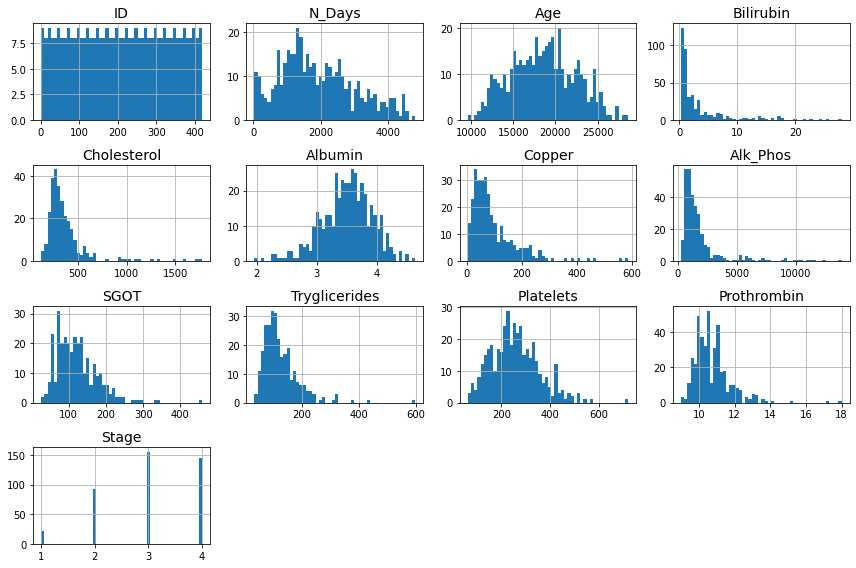

In [9]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cirrhosis.hist(bins=50, figsize=(12, 8))
save_fig("Attribute_histogram_plots")  # extra code
plt.show()

In [10]:
# six stages are missing -> drop those row
cirrhosis.dropna(subset = ["Stage"], inplace = True)

In [11]:
# Feature Engineering
# convert age to years from days
cirrhosis["Age"] = cirrhosis["Age"]/365

In [12]:
cirrhosis.isnull().sum().sum()

973

In [13]:
cirrhosis.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [14]:
# look at the possible values in categorical columns
for col in cirrhosis.columns:
  if(cirrhosis[col].dtype=="O"):
    print(col,": ",cirrhosis[col].unique())

Status :  ['D' 'C' 'CL']
Drug :  ['D-penicillamine' 'Placebo' nan]
Sex :  ['F' 'M']
Ascites :  ['Y' 'N' nan]
Hepatomegaly :  ['Y' 'N' nan]
Spiders :  ['Y' 'N' nan]
Edema :  ['Y' 'N' 'S']


In [15]:
print(cirrhosis['Sex'].value_counts())
print(cirrhosis['Ascites'].value_counts())
print(cirrhosis['Spiders'].value_counts())
print(cirrhosis['Hepatomegaly'].value_counts())
print(cirrhosis['Edema'].value_counts())

F    368
M     44
Name: Sex, dtype: int64
N    288
Y     24
Name: Ascites, dtype: int64
N    222
Y     90
Name: Spiders, dtype: int64
Y    160
N    152
Name: Hepatomegaly, dtype: int64
N    348
S     44
Y     20
Name: Edema, dtype: int64


# Target Class Analysis

In [16]:
#checking the distribution of Target Variable
print(cirrhosis['Stage'].value_counts())

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64


In [17]:
#Due to class imbalance issue, we want 3 target values instead of 4 
# Modify the target labels
cirrhosis['Stage'] = cirrhosis['Stage'].replace(2, 1)
cirrhosis['Stage'] = cirrhosis['Stage'].replace(3, 2)
cirrhosis['Stage'] = cirrhosis['Stage'].replace(4, 3)

In [18]:
#checking the distribution of Target Variable
#1 means fatty, 2 means fibrosis & 3 means cirrhosis
print(cirrhosis['Stage'].value_counts())

2.0    155
3.0    144
1.0    113
Name: Stage, dtype: int64


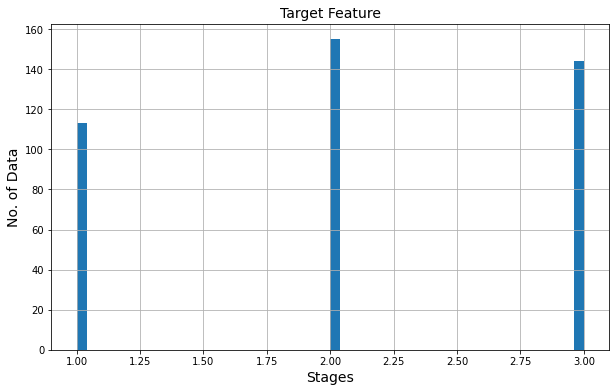

In [19]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cirrhosis['Stage'].hist(bins=50, figsize=(10, 6))
plt.xlabel('Stages')  # Add x-label
plt.ylabel('No. of Data')  # Add y-label
plt.title('Target Feature')  # Add a title
plt.show()

# Outliers Handling

In [20]:
for col in cirrhosis.columns:
    if cirrhosis[col].dtypes != 'object':
        lower_limit, upper_limit = cirrhosis[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        cirrhosis[col] = np.where(cirrhosis[col]>upper_whisker,upper_whisker,np.where(cirrhosis[col]<lower_whisker,lower_whisker,cirrhosis[col]))

# Spliting Independent And Dependent features

In [21]:
X=cirrhosis.drop('Stage',axis=1)
y=cirrhosis['Stage']

In [22]:
X

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1.0,400.0,D,D-penicillamine,58.805479,F,Y,Y,Y,Y,7.3,261.0,2.60,156.0,1718.00,137.95,172.0,190.0,12.2
1,2.0,4500.0,C,D-penicillamine,56.484932,F,N,Y,Y,N,1.1,302.0,4.14,54.0,3642.75,113.52,88.0,221.0,10.6
2,3.0,1012.0,D,D-penicillamine,70.120548,M,N,N,N,S,1.4,176.0,3.48,210.0,516.00,96.10,55.0,151.0,12.0
3,4.0,1925.0,D,D-penicillamine,54.778082,F,N,Y,Y,S,1.8,244.0,2.54,64.0,3642.75,60.63,92.0,183.0,10.3
4,5.0,1504.0,CL,Placebo,38.131507,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.00,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414.0,681.0,D,NaN,67.046575,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9
414,415.0,1103.0,C,NaN,39.027397,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2
415,416.0,1055.0,C,NaN,57.038356,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9
416,417.0,691.0,C,NaN,58.041096,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4


In [23]:
y

0      3.0
1      2.0
2      3.0
3      3.0
4      2.0
      ... 
413    2.0
414    3.0
415    2.0
416    2.0
417    3.0
Name: Stage, Length: 412, dtype: float64

## Looking for Correlation

In [24]:
corr_matrix = X.corr()


In [25]:
corr_matrix

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
ID,1.000000,-0.361034,0.028863,-0.032372,0.044059,-0.125567,-0.072452,-0.290148,-0.018117,-0.012789,-0.088242,-0.230528
N_Days,-0.361034,1.000000,-0.135844,-0.446735,-0.120450,0.439640,-0.392818,0.036120,-0.244882,-0.163386,0.169580,-0.155624
Age,0.028863,-0.135844,1.000000,-0.006725,-0.176939,-0.180681,0.064281,-0.083306,-0.160004,0.035137,-0.160239,0.138151
Bilirubin,-0.032372,-0.446735,-0.006725,1.000000,0.435144,-0.337011,0.573547,0.280062,0.529370,0.399984,-0.066414,0.342110
Cholesterol,0.044059,-0.120450,-0.176939,0.435144,1.000000,-0.033824,0.193536,0.377070,0.361762,0.365218,0.248076,-0.115136
Albumin,-0.125567,0.439640,-0.180681,-0.337011,-0.033824,1.000000,-0.292340,-0.143142,-0.210255,-0.078781,0.168718,-0.239954
Copper,-0.072452,-0.392818,0.064281,0.573547,0.193536,-0.292340,1.000000,0.252334,0.316887,0.305045,-0.080097,0.270001
Alk_Phos,-0.290148,0.036120,-0.083306,0.280062,0.377070,-0.143142,0.252334,1.000000,0.314772,0.227470,0.155223,0.095113
SGOT,-0.018117,-0.244882,-0.160004,0.529370,0.361762,-0.210255,0.316887,0.314772,1.000000,0.135579,-0.110070,0.158237
Tryglicerides,-0.012789,-0.163386,0.035137,0.399984,0.365218,-0.078781,0.305045,0.227470,0.135579,1.000000,0.076173,-0.050380


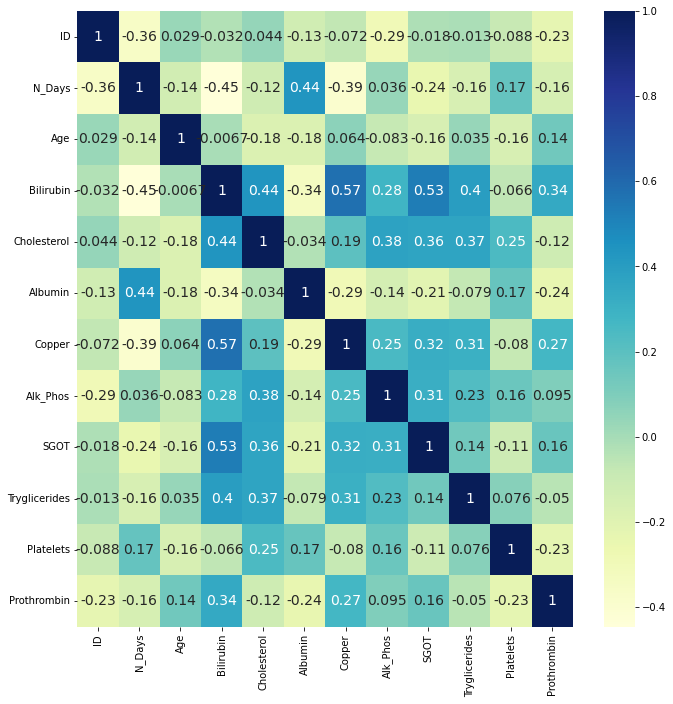

In [26]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
save_fig('correlation')
plt.show()

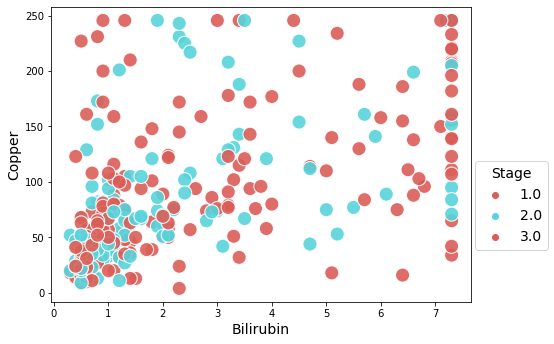

In [27]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=cirrhosis,hue='Stage',s=200,alpha=0.9,palette='hls')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")
save_fig('scatterplot')

# Stratified Train Test Split Data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [29]:
#store the values for further training testing
X_train_wp = X_train
X_test_wp = X_test
y_train_wp = y_train
y_test_wp = y_test

In [30]:
X_train

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
223,224.0,1945.0,C,D-penicillamine,38.646575,F,N,N,N,N,1.0,309.0,3.66,67.0,1214.0,158.10,101.0,309.0,9.7
239,240.0,1831.0,C,D-penicillamine,56.117808,F,N,N,N,N,0.4,232.0,3.72,24.0,369.0,51.15,139.0,326.0,10.1
386,387.0,1653.0,C,NaN,49.032877,F,NaN,NaN,NaN,S,7.3,NaN,3.00,NaN,NaN,NaN,NaN,233.0,9.9
359,360.0,778.0,D,NaN,64.043836,F,NaN,NaN,NaN,N,1.8,NaN,3.15,NaN,NaN,NaN,NaN,183.0,10.4
272,273.0,1558.0,C,Placebo,47.452055,F,N,N,Y,N,2.2,328.0,3.46,75.0,1677.0,87.00,116.0,202.0,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106.0,3222.0,D,D-penicillamine,68.556164,F,Y,Y,N,N,2.1,NaN,3.90,50.0,1087.0,103.85,NaN,137.0,10.6
382,383.0,1022.0,CL,NaN,37.024658,F,NaN,NaN,NaN,S,0.8,NaN,3.00,NaN,NaN,NaN,NaN,76.0,10.8
213,214.0,1786.0,D,Placebo,69.394521,F,N,Y,N,N,0.9,404.0,3.43,34.0,1866.0,79.05,224.0,236.0,9.9
412,413.0,989.0,C,NaN,35.024658,F,NaN,NaN,NaN,N,0.7,NaN,3.23,NaN,NaN,NaN,NaN,312.0,10.8


In [31]:
X_train.isnull().sum()

ID                0
N_Days            0
Status            0
Drug             71
Age               0
Sex               0
Ascites          71
Hepatomegaly     71
Spiders          71
Edema             0
Bilirubin         0
Cholesterol      97
Albumin           0
Copper           73
Alk_Phos         71
SGOT             71
Tryglicerides    98
Platelets         7
Prothrombin       1
dtype: int64

# Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

Objectives:

1. Drop the "ID" Column
2. Use simple imputer to impute with strategy = median
3. MinMax Scaler on numeric attributes
4. OneHot encoding on "Drug", "Status", "Edema"
5. Ordial encoding on "Sex", "Ascites", "Spiders", "Hepatomegaly"

In [33]:
cirrhosis.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [34]:
#first half pipeline
f_half_pipeline = ColumnTransformer([
    ("dropID", "drop", ['ID']),
    ("ordinal", OrdinalEncoder(),['Sex','Ascites','Spiders','Hepatomegaly','Edema']),
    ("imputer_Ordinal", SimpleImputer(strategy = 'most_frequent'), ['Drug']),
    ("mms", MinMaxScaler(), ['N_Days', 'Age','Cholesterol','Bilirubin','Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin']),
    ("donottouch", 'passthrough', ['Status']),
    
])

In [35]:
f_half_pipeline

ColumnTransformer(transformers=[('dropID', 'drop', ['ID']),
                                ('ordinal', OrdinalEncoder(),
                                 ['Sex', 'Ascites', 'Spiders', 'Hepatomegaly',
                                  'Edema']),
                                ('imputer_Ordinal',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Drug']),
                                ('mms', MinMaxScaler(),
                                 ['N_Days', 'Age', 'Cholesterol', 'Bilirubin',
                                  'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
                                  'Tryglicerides', 'Platelets',
                                  'Prothrombin']),
                                ('donottouch', 'passthrough', ['Status'])])

In [36]:
train_set = f_half_pipeline.fit_transform(X_train)
test_set = f_half_pipeline.transform(X_test)

In [37]:
train_set

array([[0.0, 0.0, 0.0, ..., 0.5494994438264738, 0.18666666666666654, 'C'],
       [0.0, 0.0, 0.0, ..., 0.5873192436040044, 0.29333333333333345, 'C'],
       [0.0, nan, nan, ..., 0.3804226918798665, 0.2400000000000002, 'C'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.38709677419354843, 0.2400000000000002, 'D'],
       [0.0, nan, nan, ..., 0.5561735261401557, 0.4800000000000004, 'C'],
       [0.0, nan, nan, ..., 0.3648498331479421, 0.3999999999999999, 'C']],
      dtype=object)

In [38]:
test_set

array([[0.0, 0.0, 0.0, ..., 0.6918798665183536, 0.5333333333333332, 'D'],
       [0.0, 0.0, 0.0, ..., 0.3759733036707453, 0.1333333333333333, 'C'],
       [0.0, 0.0, 0.0, ..., 0.5561735261401557, 0.31999999999999984, 'C'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.6540600667408232, 0.21333333333333337, 'C'],
       [0.0, nan, nan, ..., 0.0889877641824249, 0.4800000000000004, 'D'],
       [1.0, nan, nan, ..., 0.5116796440489433, 0.31999999999999984, 'D']],
      dtype=object)

In [39]:
df2 = pd.DataFrame(train_set)
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,D-penicillamine,0.421705,0.244734,0.373702,0.1,0.567757,0.260735,0.275811,0.566667,0.311748,0.549499,0.186667,C
1,0.0,0.0,0.0,0.0,0.0,D-penicillamine,0.396456,0.590934,0.221453,0.014286,0.595794,0.082773,0.023854,0.106667,0.48596,0.587319,0.293333,C
2,0.0,NaN,NaN,NaN,1.0,D-penicillamine,0.357032,0.450543,NaN,1.0,0.259346,NaN,NaN,NaN,NaN,0.380423,0.24,C
3,0.0,NaN,NaN,NaN,0.0,D-penicillamine,0.163234,0.747991,NaN,0.214286,0.329439,NaN,NaN,NaN,NaN,0.269188,0.373333,D
4,0.0,0.0,1.0,0.0,0.0,Placebo,0.335991,0.419218,0.41127,0.271429,0.474299,0.293844,0.413865,0.26086,0.380516,0.311457,0.16,C


In [40]:
#renaming
train_df = pd.DataFrame(train_set, columns = ['Sex','Ascites','Spiders','Hepatomegaly','Edema','Drug','N_Days', 'Age','Cholesterol','Bilirubin','Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin','Status'])
test_df = pd.DataFrame(test_set, columns = ['Sex','Ascites','Spiders','Hepatomegaly','Edema','Drug','N_Days', 'Age','Cholesterol','Bilirubin','Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin','Status'])

In [41]:
train_df['Drug'].value_counts()

D-penicillamine    201
Placebo            128
Name: Drug, dtype: int64

In [42]:
train_df['Status'].value_counts()

C     184
D     123
CL     22
Name: Status, dtype: int64

In [43]:
s_half_pipeline = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), ['Drug','Status']),
    ("imputer_Numeric", SimpleImputer(strategy = 'mean'), ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']),
    ("imputer_Ordinal", SimpleImputer(strategy = 'most_frequent'), ['Ascites','Spiders','Hepatomegaly']),
    ("donottouch", 'passthrough', ['Sex','Edema','N_Days','Age','Bilirubin','Albumin']),
])

In [44]:
s_half_pipeline

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Drug', 'Status']),
                                ('imputer_Numeric', SimpleImputer(),
                                 ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT',
                                  'Tryglicerides', 'Platelets',
                                  'Prothrombin']),
                                ('imputer_Ordinal',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Ascites', 'Spiders', 'Hepatomegaly']),
                                ('donottouch', 'passthrough',
                                 ['Sex', 'Edema', 'N_Days', 'Age', 'Bilirubin',
                                  'Albumin'])])

In [45]:
train_set = s_half_pipeline.fit_transform(train_df)
test_set = s_half_pipeline.transform(test_df)

In [46]:
train_set

array([[1.0, 0.0, 1.0, ..., 0.24473398479913133, 0.1, 0.5677570093457946],
       [1.0, 0.0, 1.0, ..., 0.5909337676438653, 0.01428571428571429,
        0.5957943925233649],
       [1.0, 0.0, 1.0, ..., 0.45054288816503796, 1.0, 0.2593457943925235],
       ...,
       [0.0, 1.0, 0.0, ..., 0.8540173724212812, 0.08571428571428572,
        0.460280373831776],
       [1.0, 0.0, 1.0, ..., 0.17296416938110737, 0.05714285714285714,
        0.3668224299065421],
       [1.0, 0.0, 1.0, ..., 0.3514115092290988, 0.01428571428571429,
        0.6378504672897201]], dtype=object)

In [47]:
df2 = pd.DataFrame(train_set)
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,1.0,0.0,0.0,0.373702,0.260735,0.275811,0.566667,0.311748,...,0.186667,0.0,0.0,0.0,0.0,0.0,0.421705,0.244734,0.1,0.567757
1,1.0,0.0,1.0,0.0,0.0,0.221453,0.082773,0.023854,0.106667,0.48596,...,0.293333,0.0,0.0,0.0,0.0,0.0,0.396456,0.590934,0.014286,0.595794
2,1.0,0.0,1.0,0.0,0.0,0.434654,0.355586,0.386192,0.404762,0.404356,...,0.24,0.0,0.0,1.0,0.0,1.0,0.357032,0.450543,1.0,0.259346
3,1.0,0.0,0.0,0.0,1.0,0.434654,0.355586,0.386192,0.404762,0.404356,...,0.373333,0.0,0.0,1.0,0.0,0.0,0.163234,0.747991,0.214286,0.329439
4,0.0,1.0,1.0,0.0,0.0,0.41127,0.293844,0.413865,0.26086,0.380516,...,0.16,0.0,1.0,0.0,0.0,0.0,0.335991,0.419218,0.271429,0.474299


In [48]:
#null values column created by Drug Null entries
df2[2].value_counts()

1.0    184
0.0    145
Name: 2, dtype: int64

In [49]:
#renaming
train_df = pd.DataFrame(train_set, columns = ['D-penicillamine','Placebo','Censored','Censored_liver','Death','Ascites','Spiders','Hepatomegaly','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Sex','Edema','N_Days','Age','Bilirubin','Albumin'])
test_df = pd.DataFrame(test_set, columns = ['D-penicillamine','Placebo','Censored','Censored_liver','Death','Ascites','Spiders','Hepatomegaly','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Sex','Edema','N_Days','Age','Bilirubin','Albumin'])

In [50]:
train_df

,D-penicillamine,Placebo,Censored,Censored_liver,Death,Ascites,Spiders,Hepatomegaly,Cholesterol,Copper,...,SGOT,Tryglicerides,Platelets,Prothrombin,Sex,Edema,N_Days,Age,Bilirubin,Albumin
0,1.0,0.0,1.0,0.0,0.0,0.373702,0.260735,0.275811,0.566667,0.311748,...,0.186667,0.0,0.0,0.0,0.0,0.0,0.421705,0.244734,0.1,0.567757
1,1.0,0.0,1.0,0.0,0.0,0.221453,0.082773,0.023854,0.106667,0.48596,...,0.293333,0.0,0.0,0.0,0.0,0.0,0.396456,0.590934,0.014286,0.595794
2,1.0,0.0,1.0,0.0,0.0,0.434654,0.355586,0.386192,0.404762,0.404356,...,0.24,0.0,0.0,1.0,0.0,1.0,0.357032,0.450543,1.0,0.259346
3,1.0,0.0,0.0,0.0,1.0,0.434654,0.355586,0.386192,0.404762,0.404356,...,0.373333,0.0,0.0,1.0,0.0,0.0,0.163234,0.747991,0.214286,0.329439
4,0.0,1.0,1.0,0.0,0.0,0.41127,0.293844,0.413865,0.26086,0.380516,...,0.16,0.0,1.0,0.0,0.0,0.0,0.335991,0.419218,0.271429,0.474299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1.0,0.0,0.0,0.0,1.0,0.434654,0.190378,0.237943,0.333333,0.404356,...,0.426667,1.0,0.0,1.0,0.0,0.0,0.70454,0.837405,0.257143,0.679907
325,1.0,0.0,0.0,1.0,0.0,0.434654,0.355586,0.386192,0.404762,0.404356,...,0.48,0.0,0.0,1.0,0.0,1.0,0.217276,0.212595,0.071429,0.259346
326,0.0,1.0,0.0,0.0,1.0,0.561542,0.124159,0.47022,0.226667,0.875645,...,0.24,0.0,0.0,1.0,0.0,0.0,0.386489,0.854017,0.085714,0.46028
327,1.0,0.0,1.0,0.0,0.0,0.434654,0.355586,0.386192,0.404762,0.404356,...,0.48,0.0,0.0,1.0,0.0,0.0,0.209967,0.172964,0.057143,0.366822


In [51]:
X_train = train_df

In [52]:
X_test = test_df

In [53]:
#every column consist of object type variable -> to solve this run the below code
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   D-penicillamine  329 non-null    object
 1   Placebo          329 non-null    object
 2   Censored         329 non-null    object
 3   Censored_liver   329 non-null    object
 4   Death            329 non-null    object
 5   Ascites          329 non-null    object
 6   Spiders          329 non-null    object
 7   Hepatomegaly     329 non-null    object
 8   Cholesterol      329 non-null    object
 9   Copper           329 non-null    object
 10  Alk_Phos         329 non-null    object
 11  SGOT             329 non-null    object
 12  Tryglicerides    329 non-null    object
 13  Platelets        329 non-null    object
 14  Prothrombin      329 non-null    object
 15  Sex              329 non-null    object
 16  Edema            329 non-null    object
 17  N_Days           329 non-null    ob

In [54]:
#object type to float type

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [55]:
X_train.describe().T.style.background_gradient(cmap = 'BuGn')

,count,mean,std,min,25%,50%,75%,max
D-penicillamine,329.000000,0.610942,0.488279,0.000000,0.000000,1.000000,1.000000,1.000000
Placebo,329.000000,0.389058,0.488279,0.000000,0.000000,0.000000,1.000000,1.000000
Censored,329.000000,0.559271,0.497231,0.000000,0.000000,1.000000,1.000000,1.000000
Censored_liver,329.000000,0.066869,0.250176,0.000000,0.000000,0.000000,0.000000,1.000000
Death,329.000000,0.373860,0.484564,0.000000,0.000000,0.000000,1.000000,1.000000
Ascites,329.000000,0.434654,0.208172,0.000000,0.294612,0.434654,0.474543,1.000000
Spiders,329.000000,0.355586,0.240715,0.000000,0.190378,0.355586,0.405587,1.000000
Hepatomegaly,329.000000,0.386192,0.254464,0.000000,0.212896,0.386192,0.424599,1.000000
Cholesterol,329.000000,0.404762,0.195060,0.000000,0.260860,0.404762,0.480000,1.000000
Copper,329.000000,0.404356,0.199530,0.000000,0.279656,0.404356,0.444699,1.000000


In [56]:
X_train.columns

Index(['D-penicillamine', 'Placebo', 'Censored', 'Censored_liver', 'Death',
       'Ascites', 'Spiders', 'Hepatomegaly', 'Cholesterol', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Sex',
       'Edema', 'N_Days', 'Age', 'Bilirubin', 'Albumin'],
      dtype='object')

# Model Training

In [52]:
#if not installed

#!pip install xgboost

In [57]:
def plot_classification_report(y_train, y_pred1, y_test, y_pred2, c_name):
    print("-"*25,c_name,"(TRAIN SET)","-"*25)
    print(classification_report(y_train, y_pred1))
    print("-"*25,c_name,"(Test SET)","-"*25)
    print(classification_report(y_test, y_pred2))

In [58]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [59]:
zeror = DummyClassifier(strategy='most_frequent')
knn =KNeighborsClassifier()
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier()
mlp = MLPClassifier(random_state=1,max_iter=100,solver='sgd')
svm = svm.SVC(probability=True)
logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
ada = AdaBoostClassifier()
#xgb = XGBClassifier()
lda = LinearDiscriminantAnalysis()

In [71]:
zeror.fit(X_train, y_train)
knn.fit(X_train, y_train)
gnb.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
logreg.fit(X_train, y_train)
ada.fit(X_train, y_train)
#xgb.fit(X_train, y_train)
lda.fit(X_train, y_train)

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


LinearDiscriminantAnalysis()

In [72]:
y_pred = zeror.predict(X_test)
print('ZeroR Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = knn.predict(X_test)
print('K-Nearest Neighbors  Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = gnb.predict(X_test)
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_test)
print('Decision Tree Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = mlp.predict(X_test)
print('Multi Layer Perceptron Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = svm.predict(X_test)
print('SVC Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = logreg.predict(X_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = ada.predict(X_test)
print('AdaBoost Test Accuracy ', accuracy_score(y_test, y_pred ))
#y_pred = xgb.predict(X_test)
#print('XGB Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = lda.predict(X_test)
print('Linear Discriminant Analysis Test Accuracy ', accuracy_score(y_test, y_pred ))

ZeroR Test Accuracy  0.37349397590361444
K-Nearest Neighbors  Test Accuracy  0.42168674698795183
Naive Bayes Test Accuracy  0.4939759036144578
Decision Tree Test Accuracy  0.4578313253012048
Random Forest Test Accuracy  0.5060240963855421
Multi Layer Perceptron Test Accuracy  0.42168674698795183
SVC Test Accuracy  0.4819277108433735
Logistic Regression Test Accuracy  0.4939759036144578
AdaBoost Test Accuracy  0.4457831325301205
Linear Discriminant Analysis Test Accuracy  0.46987951807228917


# Classification Report before Hyperparameter Tuning

In [73]:
c_name= "ZeroR"
plot_classification_report(y_train, zeror.predict(X_train), y_test, zeror.predict(X_test), c_name)

c_name= "K-Nearest Neighbors"
plot_classification_report(y_train, knn.predict(X_train), y_test, knn.predict(X_test), c_name)

c_name= "Naive Bayes"
plot_classification_report(y_train, gnb.predict(X_train), y_test, gnb.predict(X_test), c_name)

c_name= "Decision Tree"
plot_classification_report(y_train, dt.predict(X_train), y_test, dt.predict(X_test), c_name)

c_name= "Random Forest"
plot_classification_report(y_train, rf.predict(X_train), y_test, rf.predict(X_test), c_name)

c_name= "Multi Layer Perceptron"
plot_classification_report(y_train, mlp.predict(X_train), y_test, mlp.predict(X_test), c_name)

c_name= "Support Vector Classifier"
plot_classification_report(y_train, svm.predict(X_train), y_test, svm.predict(X_test), c_name)

c_name= "Logistic Regression"
plot_classification_report(y_train, logreg.predict(X_train), y_test, logreg.predict(X_test), c_name)

c_name= "AdaBoost"
plot_classification_report(y_train, ada.predict(X_train), y_test, ada.predict(X_test), c_name)

c_name= "Linear Discriminant Analysis"
plot_classification_report(y_train, lda.predict(X_train), y_test, lda.predict(X_test), c_name)



------------------------- ZeroR (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        90
         2.0       0.38      1.00      0.55       124
         3.0       0.00      0.00      0.00       115

    accuracy                           0.38       329
   macro avg       0.13      0.33      0.18       329
weighted avg       0.14      0.38      0.21       329

------------------------- ZeroR (Test SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        23
         2.0       0.37      1.00      0.54        31
         3.0       0.00      0.00      0.00        29

    accuracy                           0.37        83
   macro avg       0.12      0.33      0.18        83
weighted avg       0.14      0.37      0.20        83

------------------------- K-Nearest Neighbors (TRAIN SET) -------------------------
              p

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Use

# Confusion Matrix

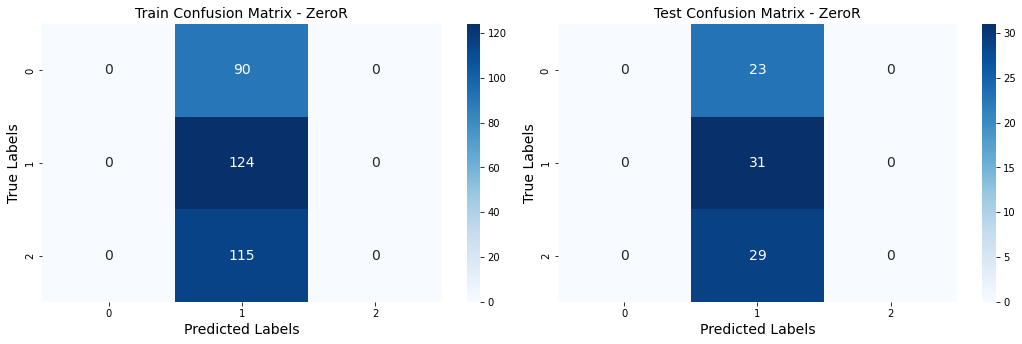

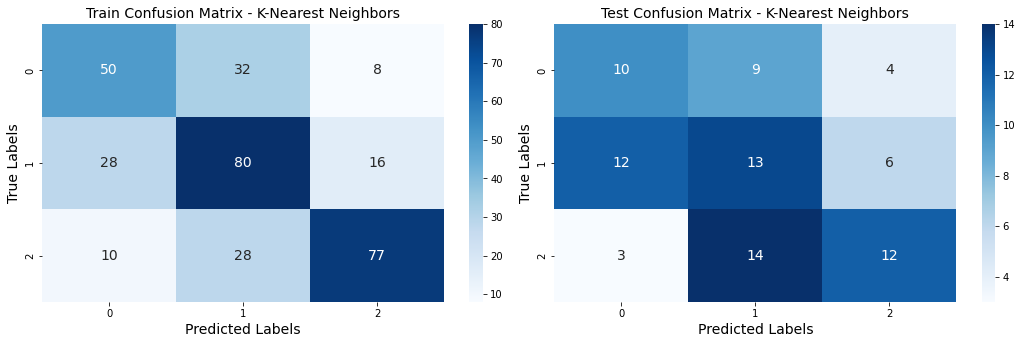

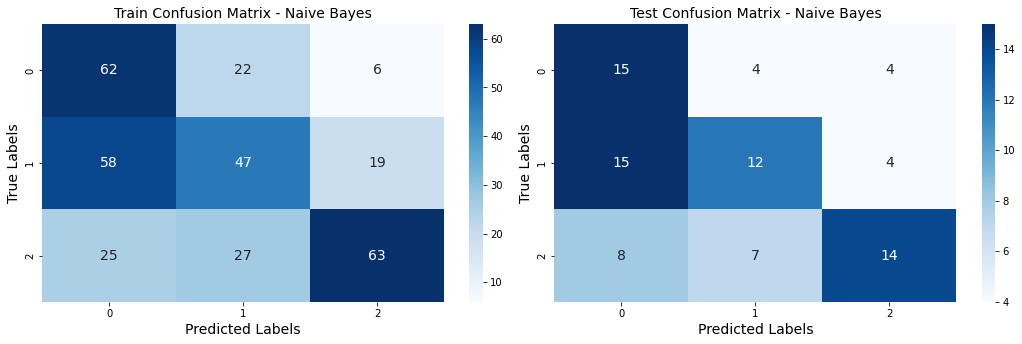

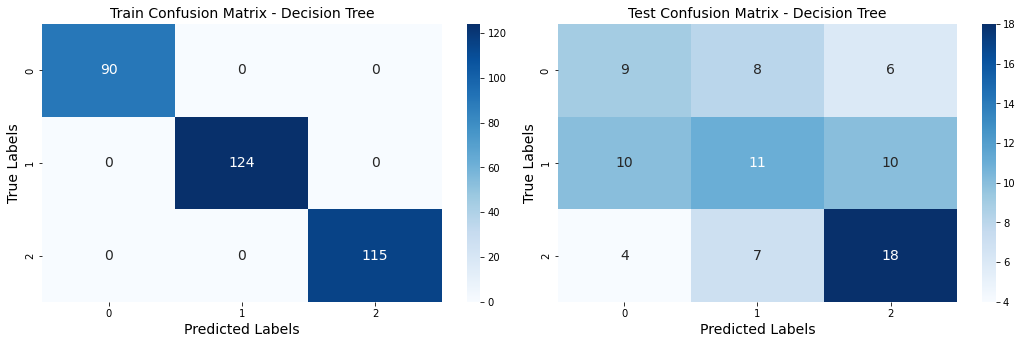

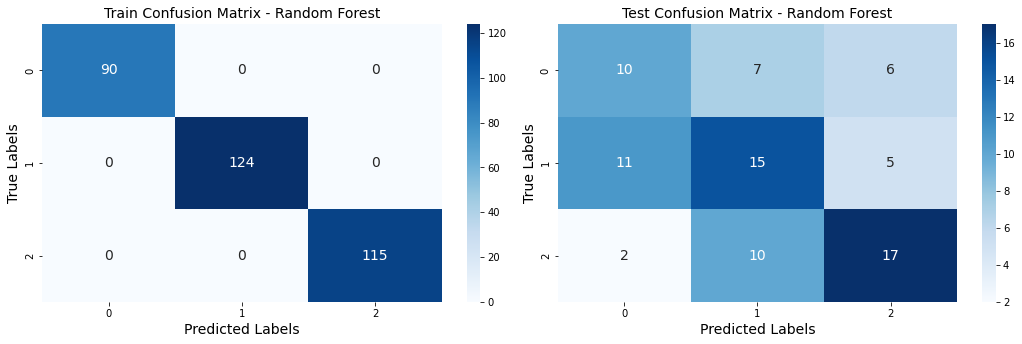

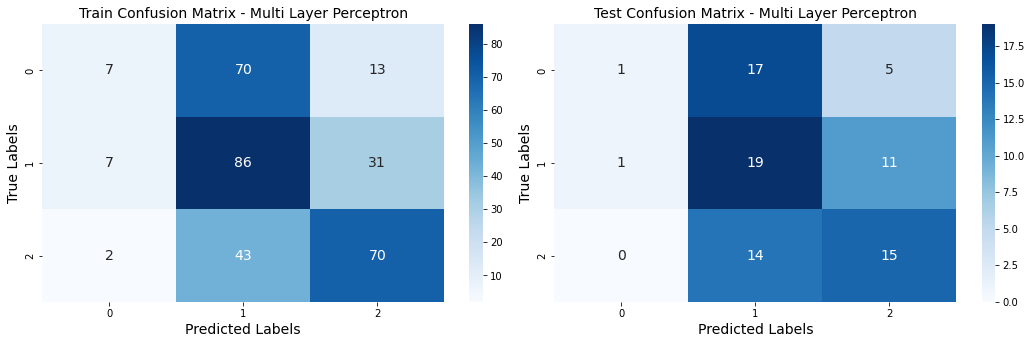

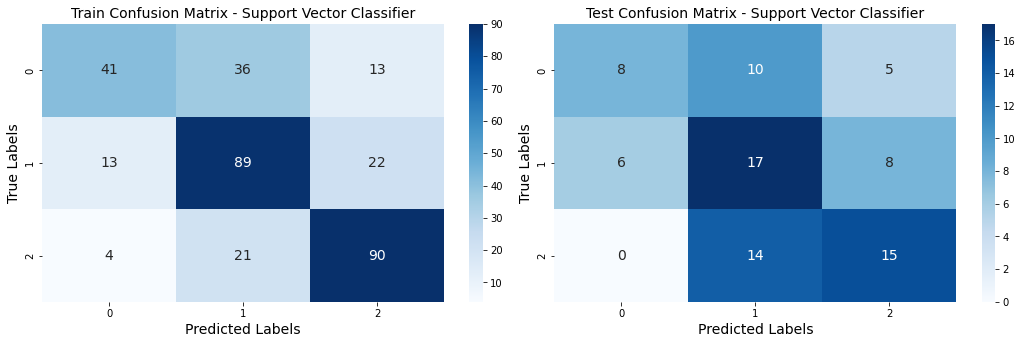

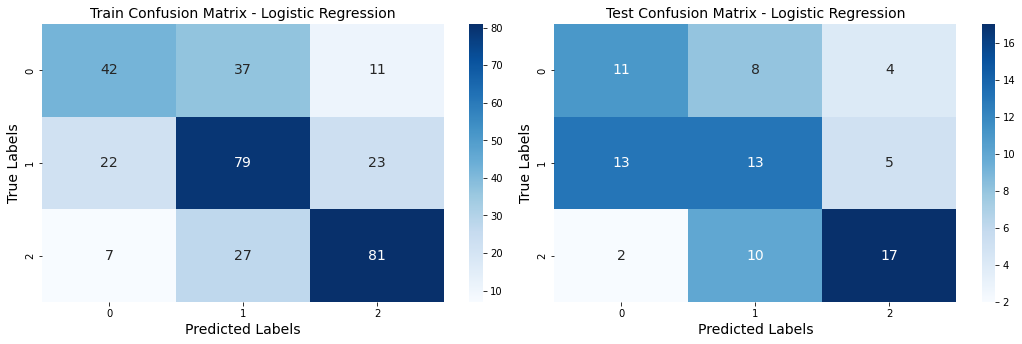

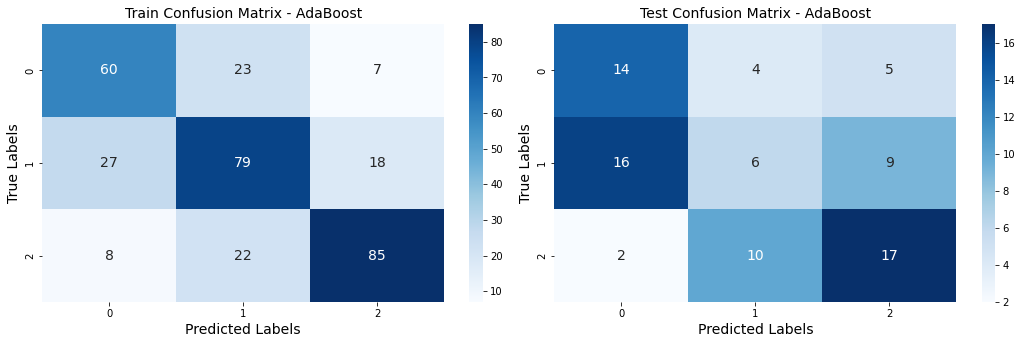

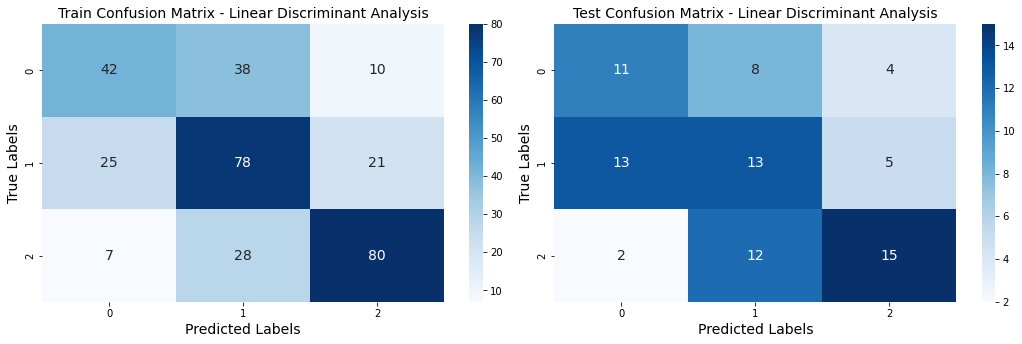

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_train_true, y_train_pred, y_test_true, y_test_pred, classifier_name):
    train_cm = confusion_matrix(y_train_true, y_train_pred)
    test_cm = confusion_matrix(y_test_true, y_test_pred)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Train Confusion Matrix
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title(f'Train Confusion Matrix - {classifier_name}')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    
    # Test Confusion Matrix
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
    axes[1].set_title(f'Test Confusion Matrix - {classifier_name}')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')
    
    plt.tight_layout()
    save_fig(classifier_name+"_cm")  # extra code
    plt.show()

# Generate confusion matrix for each classifier
plot_confusion_matrix(y_train, zeror.predict(X_train), y_test, zeror.predict(X_test), "ZeroR")
plot_confusion_matrix(y_train, knn.predict(X_train), y_test, knn.predict(X_test), "K-Nearest Neighbors")
plot_confusion_matrix(y_train, gnb.predict(X_train), y_test, gnb.predict(X_test), "Naive Bayes")
plot_confusion_matrix(y_train, dt.predict(X_train), y_test, dt.predict(X_test), "Decision Tree")
plot_confusion_matrix(y_train, rf.predict(X_train), y_test, rf.predict(X_test), "Random Forest")
plot_confusion_matrix(y_train, mlp.predict(X_train), y_test, mlp.predict(X_test), "Multi Layer Perceptron")
plot_confusion_matrix(y_train, svm.predict(X_train), y_test, svm.predict(X_test), "Support Vector Classifier")
plot_confusion_matrix(y_train, logreg.predict(X_train), y_test, logreg.predict(X_test), "Logistic Regression")
plot_confusion_matrix(y_train, ada.predict(X_train), y_test, ada.predict(X_test), "AdaBoost")
plot_confusion_matrix(y_train, lda.predict(X_train), y_test, lda.predict(X_test), "Linear Discriminant Analysis")


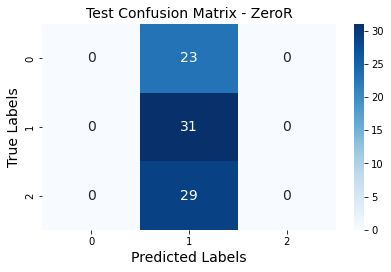

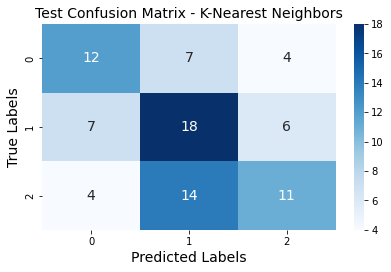

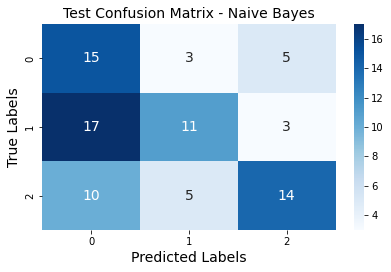

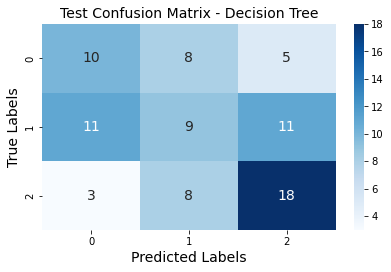

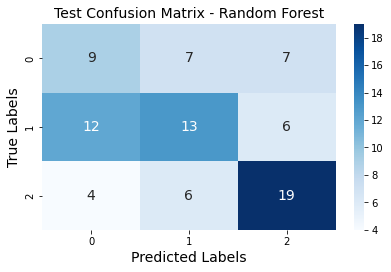

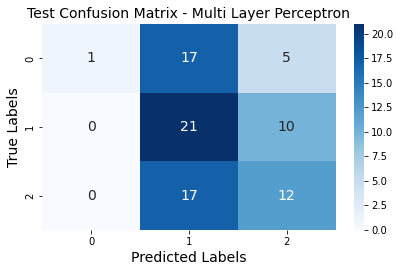

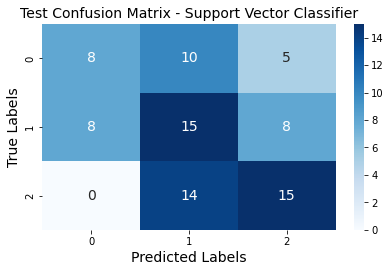

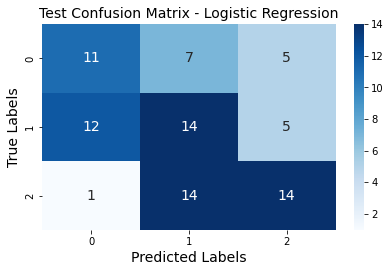

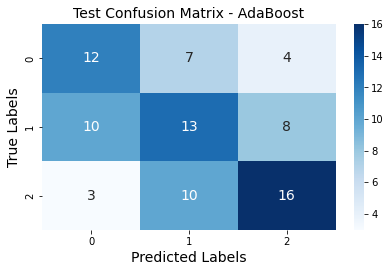

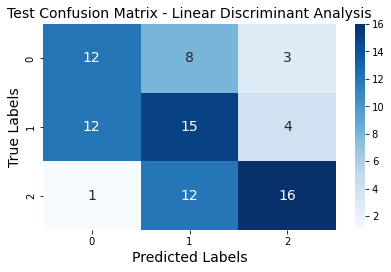

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test_true, y_test_pred, classifier_name):
    test_cm = confusion_matrix(y_test_true, y_test_pred)
    
    plt.figure(figsize=(6, 4))
    
    # Test Confusion Matrix
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Test Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    plt.tight_layout()
    save_fig(classifier_name+"_cm")  # extra code
    plt.show()

# Generate confusion matrix for each classifier
plot_confusion_matrix(y_test, zeror.predict(X_test), "ZeroR")
plot_confusion_matrix(y_test, knn.predict(X_test), "K-Nearest Neighbors")
plot_confusion_matrix(y_test, gnb.predict(X_test), "Naive Bayes")
plot_confusion_matrix(y_test, dt.predict(X_test), "Decision Tree")
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest")
plot_confusion_matrix(y_test, mlp.predict(X_test), "Multi Layer Perceptron")
plot_confusion_matrix(y_test, svm.predict(X_test), "Support Vector Classifier")
plot_confusion_matrix(y_test, logreg.predict(X_test), "Logistic Regression")
plot_confusion_matrix(y_test, ada.predict(X_test), "AdaBoost")
plot_confusion_matrix(y_test, lda.predict(X_test), "Linear Discriminant Analysis")


In [75]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

classifiers = [
    ("ZeroR", zeror.predict(X_train), zeror.predict(X_test)),
    ("K-Nearest Neighbors", knn.predict(X_train), knn.predict(X_test)),
    ("Naive Bayes", gnb.predict(X_train), gnb.predict(X_test)),
    ("Decision Tree", dt.predict(X_train), dt.predict(X_test)),
    ("Random Forest", rf.predict(X_train), rf.predict(X_test)),
    ("Multi Layer Perceptron", mlp.predict(X_train), mlp.predict(X_test)),
    ("Support Vector Classifier", svm.predict(X_train), svm.predict(X_test)),
    ("Logistic Regression", logreg.predict(X_train), logreg.predict(X_test)),
    ("AdaBoost", ada.predict(X_train), ada.predict(X_test)),
    ("Linear Discriminant Analysis", lda.predict(X_train), lda.predict(X_test))
]

for classifier in classifiers:
    c_name, y_train_pred, y_test_pred = classifier
    
    # Calculate class-wise precision and recall for training set
    train_precision = precision_score(y_train, y_train_pred, average=None)
    train_recall = recall_score(y_train, y_train_pred, average=None)
    
    # Calculate class-wise precision and recall for test set
    test_precision = precision_score(y_test, y_test_pred, average=None)
    test_recall = recall_score(y_test, y_test_pred, average=None)
    
    print(f"Classifier: {c_name}")
    
    # Print class-wise precision and recall for training set
    print("Training Set:")
    for i in range(len(train_precision)):
        print(f"Class {i+1}: Precision = {train_precision[i]}, Recall = {train_recall[i]}")
    
    # Print class-wise precision and recall for test set
    print("Test Set:")
    for i in range(len(test_precision)):
        print(f"Class {i+1}: Precision = {test_precision[i]}, Recall = {test_recall[i]}")
    
    print()


Classifier: ZeroR
Training Set:
Class 1: Precision = 0.0, Recall = 0.0
Class 2: Precision = 0.3768996960486322, Recall = 1.0
Class 3: Precision = 0.0, Recall = 0.0
Test Set:
Class 1: Precision = 0.0, Recall = 0.0
Class 2: Precision = 0.37349397590361444, Recall = 1.0
Class 3: Precision = 0.0, Recall = 0.0

Classifier: K-Nearest Neighbors
Training Set:
Class 1: Precision = 0.5681818181818182, Recall = 0.5555555555555556
Class 2: Precision = 0.5714285714285714, Recall = 0.6451612903225806
Class 3: Precision = 0.7623762376237624, Recall = 0.6695652173913044
Test Set:
Class 1: Precision = 0.4, Recall = 0.43478260869565216
Class 2: Precision = 0.3611111111111111, Recall = 0.41935483870967744
Class 3: Precision = 0.5454545454545454, Recall = 0.41379310344827586

Classifier: Naive Bayes
Training Set:
Class 1: Precision = 0.42758620689655175, Recall = 0.6888888888888889
Class 2: Precision = 0.4895833333333333, Recall = 0.3790322580645161
Class 3: Precision = 0.7159090909090909, Recall = 0.5478

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tuning

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
import numpy as np

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grids for each classifier
param_grid_zeror = {}
param_grid_knn = {
    'n_neighbors': [5, 10],
    'weights': ['uniform', 'distance'],
}
param_grid_gnb = {}
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
param_grid_rf = {
    'n_estimators': [20],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,100), (200,)],
    'max_iter': [200, 250],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

# Perform grid search for each classifier
classifiers = [
    ("ZeroR", zeror, param_grid_zeror),
    ("K-Nearest Neighbors", knn, param_grid_knn),
    ("Naive Bayes", gnb, param_grid_gnb),
    ("Decision Tree", dt, param_grid_dt),
    ("Random Forest", rf, param_grid_rf),
    ("Multi Layer Perceptron", mlp, param_grid_mlp),
    ("Support Vector Classifier", svm, param_grid_svm),
    ("Logistic Regression", logreg, param_grid_logreg),
    ("AdaBoost", ada, param_grid_ada),
    ("Linear Discriminant Analysis", lda, param_grid_lda)
]

for classifier in classifiers:
    c_name, clf, param_grid = classifier
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters and classification report
    print(f"Classifier: {c_name}")
    print("Best Hyperparameters:", grid_search.best_params_)
    grid_search.best_estimator_
    
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    
    print("Training Set:")
    print(accuracy_score(y_train, y_train_pred))
    
    print("Test Set:")
    print(accuracy_score(y_test, y_test_pred))
    
    print()


Classifier: ZeroR
Best Hyperparameters: {}
Training Set:
0.3768996960486322
Test Set:
0.37349397590361444

Classifier: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 10, 'weights': 'distance'}
Training Set:
1.0
Test Set:
0.4819277108433735

Classifier: Naive Bayes
Best Hyperparameters: {}
Training Set:
0.513677811550152
Test Set:
0.4819277108433735

Classifier: Decision Tree
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training Set:
0.6808510638297872
Test Set:
0.3855421686746988

Classifier: Random Forest
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
Training Set:
0.7963525835866262
Test Set:
0.4819277108433735

Classifier: Multi Layer Perceptron
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 250, 'solver': 'adam'}
Training Set:
0.6170212765957447
Te

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grids for each classifier
param_grid_zeror = {}
param_grid_knn = {
    'n_neighbors': [5, 10],
    'weights': ['uniform', 'distance'],
}
param_grid_gnb = {}
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
param_grid_rf = {
    'n_estimators': [20],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,100), (200,)],
    'max_iter': [200, 250],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

# Perform grid search for each classifier
classifiers = [
    ("ZeroR", zeror, param_grid_zeror),
    ("K-Nearest Neighbors", knn, param_grid_knn),
    ("Naive Bayes", gnb, param_grid_gnb),
    ("Decision Tree", dt, param_grid_dt),
    ("Random Forest", rf, param_grid_rf),
    ("Multi Layer Perceptron", mlp, param_grid_mlp),
    ("Support Vector Classifier", svm, param_grid_svm),
    ("Logistic Regression", logreg, param_grid_logreg),
    ("AdaBoost", ada, param_grid_ada),
    ("Linear Discriminant Analysis", lda, param_grid_lda)
]

for classifier in classifiers:
    c_name, clf, param_grid = classifier
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=10)
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters and classification report
    print(f"Classifier: {c_name}")
    print("Best Hyperparameters:", grid_search.best_params_)
    grid_search.best_estimator_
    
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    
    print("Training Set:")
    print(accuracy_score(y_train, y_train_pred))
    
    print("Test Set:")
    print(accuracy_score(y_test, y_test_pred))
    
    print()


Classifier: ZeroR
Best Hyperparameters: {}
Training Set:
0.3768996960486322
Test Set:
0.37349397590361444

Classifier: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 10, 'weights': 'distance'}
Training Set:
1.0
Test Set:
0.4819277108433735

Classifier: Naive Bayes
Best Hyperparameters: {}
Training Set:
0.513677811550152
Test Set:
0.4819277108433735

Classifier: Decision Tree
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training Set:
0.8814589665653495
Test Set:
0.40963855421686746

Classifier: Random Forest
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Training Set:
0.9908814589665653
Test Set:
0.5180722891566265



/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

Classifier: Multi Layer Perceptron
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Training Set:
0.6382978723404256
Test Set:
0.46987951807228917

Classifier: Support Vector Classifier
Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Training Set:
0.6261398176291794
Test Set:
0.5060240963855421



/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ramisarifa/opt/ana

/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Classifier: Logistic Regression
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Training Set:
0.6261398176291794
Test Set:
0.4819277108433735

Classifier: AdaBoost
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Training Set:
0.601823708206687
Test Set:
0.4939759036144578

Classifier: Linear Discriminant Analysis
Best Hyperparameters: {'shrinkage': 'auto', 'solver': 'lsqr'}
Training Set:
0.60790273556231
Test Set:
0.5180722891566265



/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/Users/ramisarifa/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    e

# AUC Score ROC CURVE

In [70]:
from sklearn.metrics import roc_curve
pred_prob1 = zeror.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = gnb.predict_proba(X_test)
pred_prob4 = dt.predict_proba(X_test)
pred_prob5 = rf.predict_proba(X_test)
pred_prob6 = mlp.predict_proba(X_test)
pred_prob7 = svm.predict_proba(X_test)
pred_prob8 = logreg.predict_proba(X_test)
pred_prob9 = ada.predict_proba(X_test)
pred_prob10 = lda.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh1 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh2 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)
fpr9, tpr9, thresh3 = roc_curve(y_test, pred_prob9[:,1], pos_label=1)
fpr10, tpr10, thresh4 = roc_curve(y_test, pred_prob10[:,1], pos_label=1)




# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [71]:
from sklearn.metrics import roc_auc_score

# Compute AUC scores for each classifier
auc_score1 = roc_auc_score(y_test, pred_prob1, multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob2, multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob3, multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob4, multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob5, multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob6, multi_class='ovr')
auc_score7 = roc_auc_score(y_test, pred_prob7, multi_class='ovr')
auc_score8 = roc_auc_score(y_test, pred_prob8, multi_class='ovr')
auc_score9 = roc_auc_score(y_test, pred_prob9, multi_class='ovr')
auc_score10 = roc_auc_score(y_test, pred_prob10, multi_class='ovr')

# Print AUC scores
print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6, auc_score7, auc_score8, auc_score9, auc_score10)


0.5 0.6131482324273025 0.6821920351284702 0.5847454845318817 0.7152038113375992 0.5963692035059577 0.6591402212688343 0.6835366091423548 0.6608047207900507 0.679143552477047


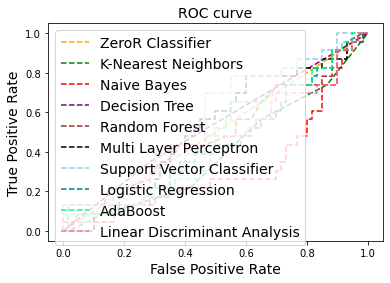

In [73]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='ZeroR Classifier')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='K-Nearest Neighbors')
plt.plot(fpr3, tpr3, linestyle='--', color='red', label='Naive Bayes')
plt.plot(fpr4, tpr4, linestyle='--', color='purple', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--', color='brown', label='Random Forest')
plt.plot(fpr6, tpr6, linestyle='--', color='black', label='Multi Layer Perceptron')
plt.plot(fpr7, tpr7, linestyle='--', color='skyblue', label='Support Vector Classifier')
plt.plot(fpr8, tpr8, linestyle='--', color='teal', label='Logistic Regression')
plt.plot(fpr9, tpr9, linestyle='--', color='springgreen', label='AdaBoost')
plt.plot(fpr10, tpr10, linestyle='--', color='hotpink', label='Linear Discriminant Analysis')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()


# Explainable AI

In [87]:
!pip install --upgrade scikit-learn

In [76]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, ensemble, model_selection
import numpy as np
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import shap
from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [77]:
shap.initjs()

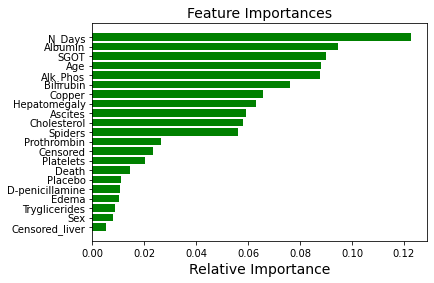

In [78]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [79]:
# compute SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

In [80]:
class_names = [1, 2, 3]

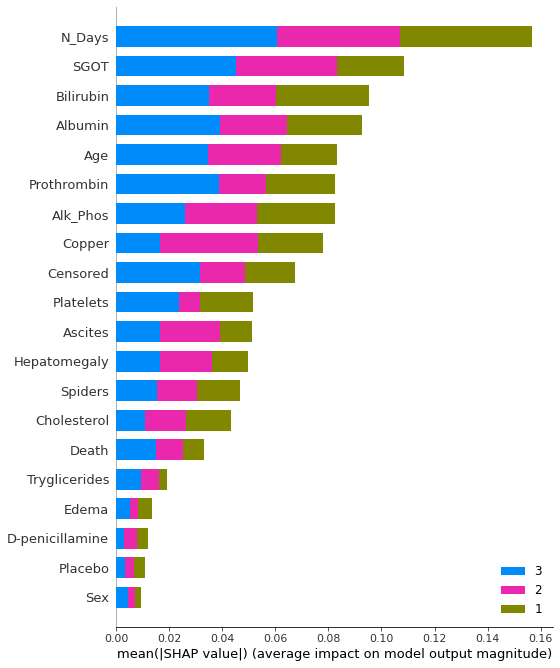

In [81]:
shap.summary_plot(shap_values, X_train.values, plot_type="bar", class_names= class_names, feature_names = X_train.columns)

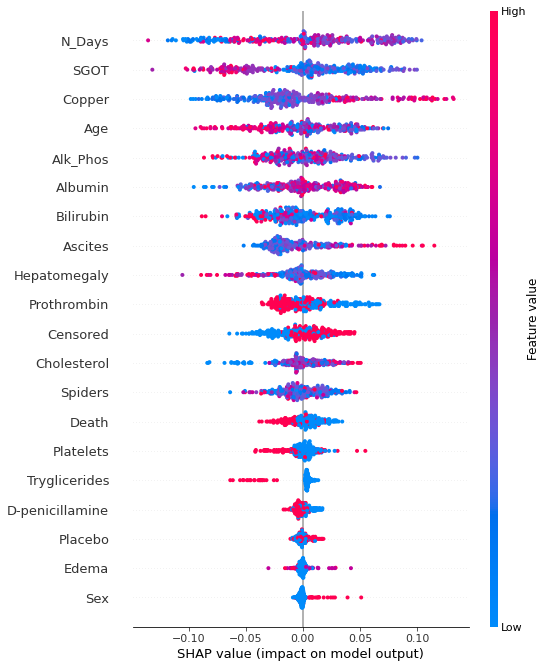

In [82]:
shap.summary_plot(shap_values[1], X_train.values, feature_names = X_train.columns)

In [83]:
#elimating lowest degree of important feature 

In [84]:
X_f_train = X_train

In [85]:
X_f_train = X_f_train.drop('Sex',axis=1)

In [87]:
X_f_train.columns

Index(['D-penicillamine', 'Placebo', 'Censored', 'Censored_liver', 'Death',
       'Ascites', 'Spiders', 'Hepatomegaly', 'Cholesterol', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Edema', 'N_Days', 'Age', 'Bilirubin', 'Albumin'],
      dtype='object')

In [88]:
X_f_test = X_test

In [89]:
X_f_test = X_f_test.drop('Sex',axis=1)

In [90]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [91]:
zeror = DummyClassifier(strategy='most_frequent')
knn =KNeighborsClassifier()
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier()
mlp = MLPClassifier(random_state=1,max_iter=100,solver='sgd')
svm = svm.SVC(probability=True)
logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
ada = AdaBoostClassifier()
#xgb = XGBClassifier()
lda = LinearDiscriminantAnalysis()

In [92]:
zeror.fit(X_f_train, y_train)
knn.fit(X_f_train, y_train)
gnb.fit(X_f_train, y_train)
dt.fit(X_f_train, y_train)
rf.fit(X_f_train, y_train)
mlp.fit(X_f_train, y_train)
svm.fit(X_f_train, y_train)
logreg.fit(X_f_train, y_train)
ada.fit(X_f_train, y_train)
#xgb.fit(X_train, y_train)
lda.fit(X_f_train, y_train)

LinearDiscriminantAnalysis()

In [93]:
y_pred = zeror.predict(X_f_test)
print('ZeroR Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = knn.predict(X_f_test)
print('K-Nearest Neighbors  Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = gnb.predict(X_f_test)
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_f_test)
print('Decision Tree Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_f_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = mlp.predict(X_f_test)
print('Multi Layer Perceptron Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = svm.predict(X_f_test)
print('SVC Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = logreg.predict(X_f_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = ada.predict(X_f_test)
print('AdaBoost Test Accuracy ', accuracy_score(y_test, y_pred ))
#y_pred = xgb.predict(X_test)
#print('XGB Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = lda.predict(X_f_test)
print('Linear Discriminant Analysis Test Accuracy ', accuracy_score(y_test, y_pred ))

ZeroR Test Accuracy  0.37349397590361444
K-Nearest Neighbors  Test Accuracy  0.4457831325301205
Naive Bayes Test Accuracy  0.4939759036144578
Decision Tree Test Accuracy  0.4457831325301205
Random Forest Test Accuracy  0.5180722891566265
Multi Layer Perceptron Test Accuracy  0.42168674698795183
SVC Test Accuracy  0.4578313253012048
Logistic Regression Test Accuracy  0.46987951807228917
AdaBoost Test Accuracy  0.4457831325301205
Linear Discriminant Analysis Test Accuracy  0.4578313253012048


In [94]:
X_f_train = X_f_train.drop('Edema',axis=1)
X_f_test = X_f_test.drop('Edema',axis=1)

In [95]:
zeror.fit(X_f_train, y_train)
knn.fit(X_f_train, y_train)
gnb.fit(X_f_train, y_train)
dt.fit(X_f_train, y_train)
rf.fit(X_f_train, y_train)
mlp.fit(X_f_train, y_train)
svm.fit(X_f_train, y_train)
logreg.fit(X_f_train, y_train)
ada.fit(X_f_train, y_train)
#xgb.fit(X_train, y_train)
lda.fit(X_f_train, y_train)

LinearDiscriminantAnalysis()

In [96]:
y_pred = zeror.predict(X_f_test)
print('ZeroR Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = knn.predict(X_f_test)
print('K-Nearest Neighbors  Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = gnb.predict(X_f_test)
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_f_test)
print('Decision Tree Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_f_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = mlp.predict(X_f_test)
print('Multi Layer Perceptron Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = svm.predict(X_f_test)
print('SVC Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = logreg.predict(X_f_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = ada.predict(X_f_test)
print('AdaBoost Test Accuracy ', accuracy_score(y_test, y_pred ))
#y_pred = xgb.predict(X_test)
#print('XGB Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = lda.predict(X_f_test)
print('Linear Discriminant Analysis Test Accuracy ', accuracy_score(y_test, y_pred ))

ZeroR Test Accuracy  0.37349397590361444
K-Nearest Neighbors  Test Accuracy  0.43373493975903615
Naive Bayes Test Accuracy  0.4819277108433735
Decision Tree Test Accuracy  0.42168674698795183
Random Forest Test Accuracy  0.5301204819277109
Multi Layer Perceptron Test Accuracy  0.5180722891566265
SVC Test Accuracy  0.4819277108433735
Logistic Regression Test Accuracy  0.5180722891566265
AdaBoost Test Accuracy  0.4457831325301205
Linear Discriminant Analysis Test Accuracy  0.5180722891566265


In [ ]:
X_f_train = X_f_train.drop('Placebo',axis=1)
X_f_test = X_f_test.drop('Placebo',axis=1)

In [100]:
zeror.fit(X_f_train, y_train)
knn.fit(X_f_train, y_train)
gnb.fit(X_f_train, y_train)
dt.fit(X_f_train, y_train)
rf.fit(X_f_train, y_train)
mlp.fit(X_f_train, y_train)
svm.fit(X_f_train, y_train)
logreg.fit(X_f_train, y_train)
ada.fit(X_f_train, y_train)
#xgb.fit(X_train, y_train)
lda.fit(X_f_train, y_train)

LinearDiscriminantAnalysis()

In [101]:
y_pred = zeror.predict(X_f_test)
print('ZeroR Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = knn.predict(X_f_test)
print('K-Nearest Neighbors  Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = gnb.predict(X_f_test)
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_f_test)
print('Decision Tree Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_f_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = mlp.predict(X_f_test)
print('Multi Layer Perceptron Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = svm.predict(X_f_test)
print('SVC Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = logreg.predict(X_f_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = ada.predict(X_f_test)
print('AdaBoost Test Accuracy ', accuracy_score(y_test, y_pred ))
#y_pred = xgb.predict(X_test)
#print('XGB Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = lda.predict(X_f_test)
print('Linear Discriminant Analysis Test Accuracy ', accuracy_score(y_test, y_pred ))

ZeroR Test Accuracy  0.37349397590361444
K-Nearest Neighbors  Test Accuracy  0.4457831325301205
Naive Bayes Test Accuracy  0.4819277108433735
Decision Tree Test Accuracy  0.4457831325301205
Random Forest Test Accuracy  0.5301204819277109
Multi Layer Perceptron Test Accuracy  0.43373493975903615
SVC Test Accuracy  0.4819277108433735
Logistic Regression Test Accuracy  0.5180722891566265
AdaBoost Test Accuracy  0.4457831325301205
Linear Discriminant Analysis Test Accuracy  0.5180722891566265


In [102]:
X_f_train = X_f_train.drop('D-penicillamine',axis=1)
X_f_test = X_f_test.drop('D-penicillamine',axis=1)

In [103]:
zeror.fit(X_f_train, y_train)
knn.fit(X_f_train, y_train)
gnb.fit(X_f_train, y_train)
dt.fit(X_f_train, y_train)
rf.fit(X_f_train, y_train)
mlp.fit(X_f_train, y_train)
svm.fit(X_f_train, y_train)
logreg.fit(X_f_train, y_train)
ada.fit(X_f_train, y_train)
#xgb.fit(X_train, y_train)
lda.fit(X_f_train, y_train)

LinearDiscriminantAnalysis()

In [104]:
y_pred = zeror.predict(X_f_test)
print('ZeroR Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = knn.predict(X_f_test)
print('K-Nearest Neighbors  Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = gnb.predict(X_f_test)
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_f_test)
print('Decision Tree Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_f_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = mlp.predict(X_f_test)
print('Multi Layer Perceptron Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = svm.predict(X_f_test)
print('SVC Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = logreg.predict(X_f_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = ada.predict(X_f_test)
print('AdaBoost Test Accuracy ', accuracy_score(y_test, y_pred ))
#y_pred = xgb.predict(X_test)
#print('XGB Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = lda.predict(X_f_test)
print('Linear Discriminant Analysis Test Accuracy ', accuracy_score(y_test, y_pred ))

ZeroR Test Accuracy  0.37349397590361444
K-Nearest Neighbors  Test Accuracy  0.39759036144578314
Naive Bayes Test Accuracy  0.4819277108433735
Decision Tree Test Accuracy  0.42168674698795183
Random Forest Test Accuracy  0.4939759036144578
Multi Layer Perceptron Test Accuracy  0.4819277108433735
SVC Test Accuracy  0.4819277108433735
Logistic Regression Test Accuracy  0.5060240963855421
AdaBoost Test Accuracy  0.4457831325301205
Linear Discriminant Analysis Test Accuracy  0.5060240963855421


In [105]:
X_f_train = X_train
X_f_test = X_test

In [106]:
X_f_train = X_f_train.drop('Placebo',axis=1)
X_f_test = X_f_test.drop('Placebo',axis=1)

In [109]:
X_f_train.columns

Index(['D-penicillamine', 'Censored', 'Censored_liver', 'Death', 'Ascites',
       'Spiders', 'Hepatomegaly', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Sex', 'Edema', 'N_Days',
       'Age', 'Bilirubin', 'Albumin'],
      dtype='object')

In [107]:
zeror.fit(X_f_train, y_train)
knn.fit(X_f_train, y_train)
gnb.fit(X_f_train, y_train)
dt.fit(X_f_train, y_train)
rf.fit(X_f_train, y_train)
mlp.fit(X_f_train, y_train)
svm.fit(X_f_train, y_train)
logreg.fit(X_f_train, y_train)
ada.fit(X_f_train, y_train)
#xgb.fit(X_train, y_train)
lda.fit(X_f_train, y_train)

LinearDiscriminantAnalysis()

In [108]:
y_pred = zeror.predict(X_f_test)
print('ZeroR Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = knn.predict(X_f_test)
print('K-Nearest Neighbors  Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = gnb.predict(X_f_test)
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = dt.predict(X_f_test)
print('Decision Tree Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = rf.predict(X_f_test)
print('Random Forest Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = mlp.predict(X_f_test)
print('Multi Layer Perceptron Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = svm.predict(X_f_test)
print('SVC Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = logreg.predict(X_f_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = ada.predict(X_f_test)
print('AdaBoost Test Accuracy ', accuracy_score(y_test, y_pred ))
#y_pred = xgb.predict(X_test)
#print('XGB Classifier Test Accuracy ', accuracy_score(y_test, y_pred ))
y_pred = lda.predict(X_f_test)
print('Linear Discriminant Analysis Test Accuracy ', accuracy_score(y_test, y_pred ))

ZeroR Test Accuracy  0.37349397590361444
K-Nearest Neighbors  Test Accuracy  0.40963855421686746
Naive Bayes Test Accuracy  0.4939759036144578
Decision Tree Test Accuracy  0.46987951807228917
Random Forest Test Accuracy  0.46987951807228917
Multi Layer Perceptron Test Accuracy  0.5180722891566265
SVC Test Accuracy  0.4819277108433735
Logistic Regression Test Accuracy  0.4939759036144578
AdaBoost Test Accuracy  0.4457831325301205
Linear Discriminant Analysis Test Accuracy  0.46987951807228917


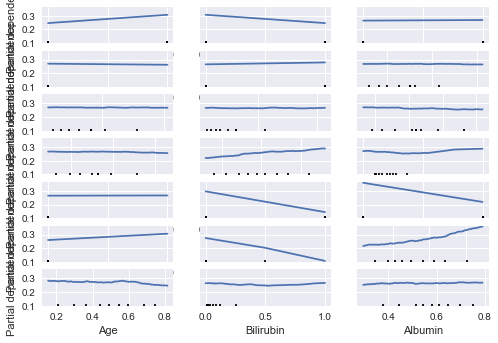

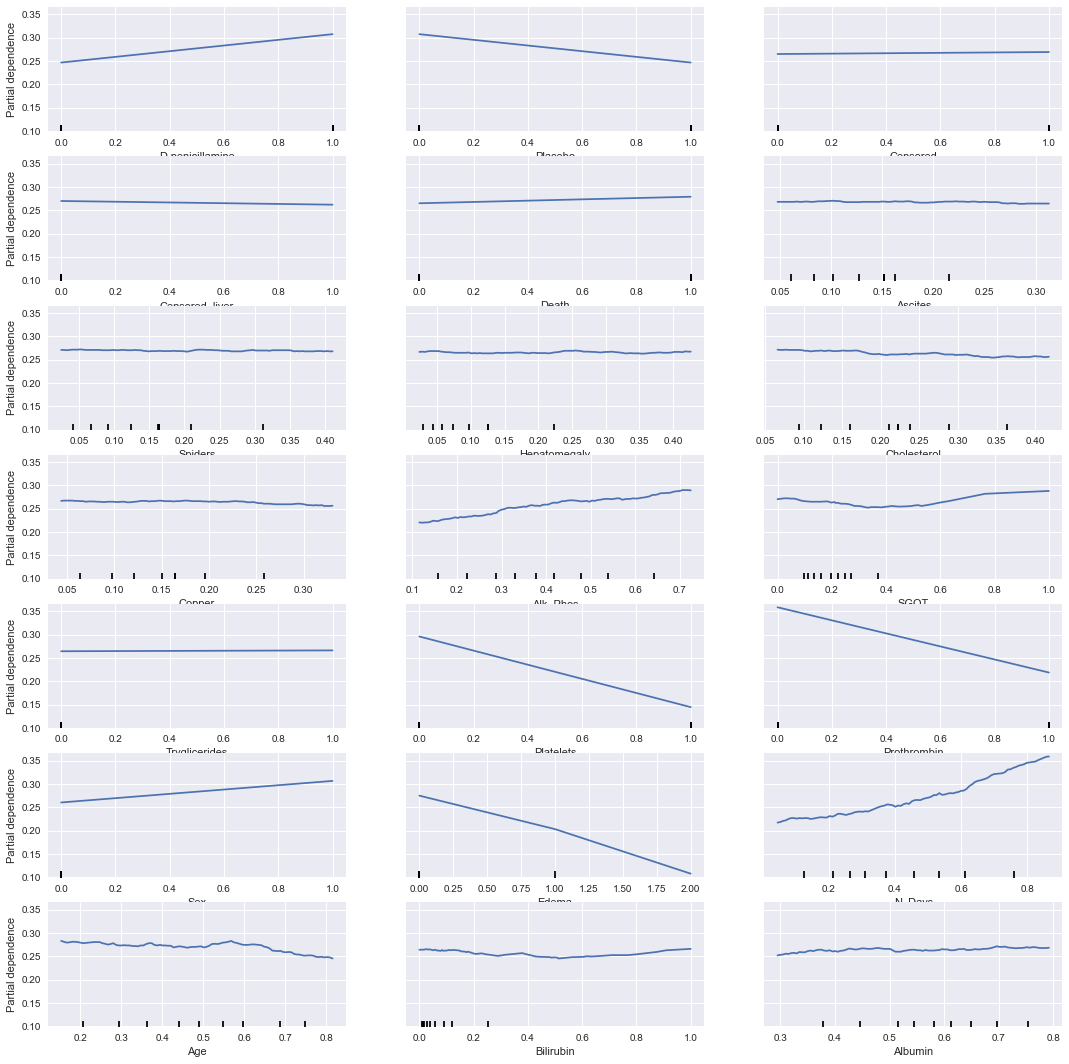

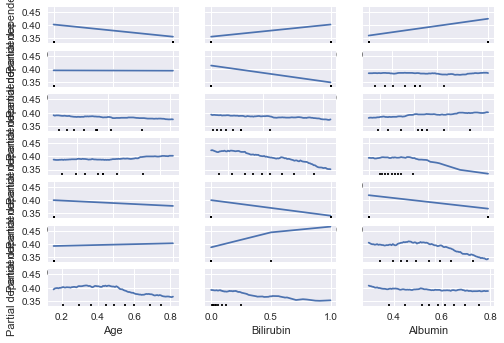

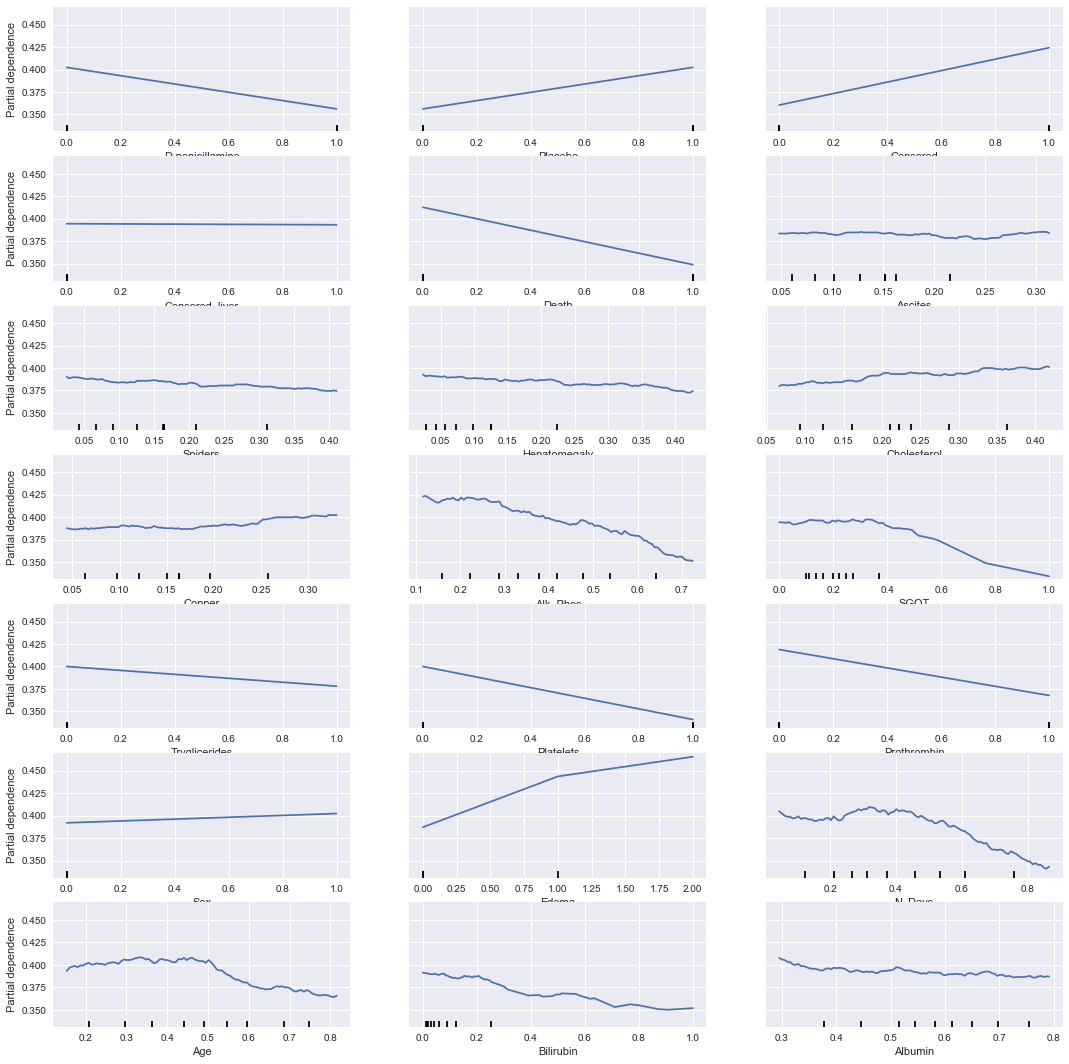

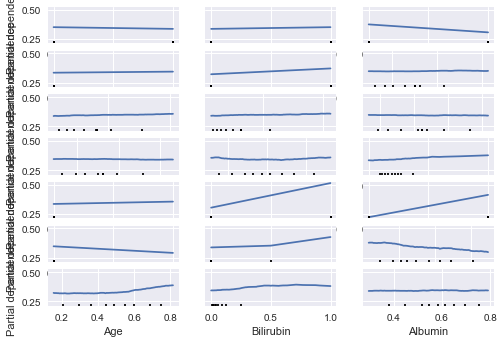

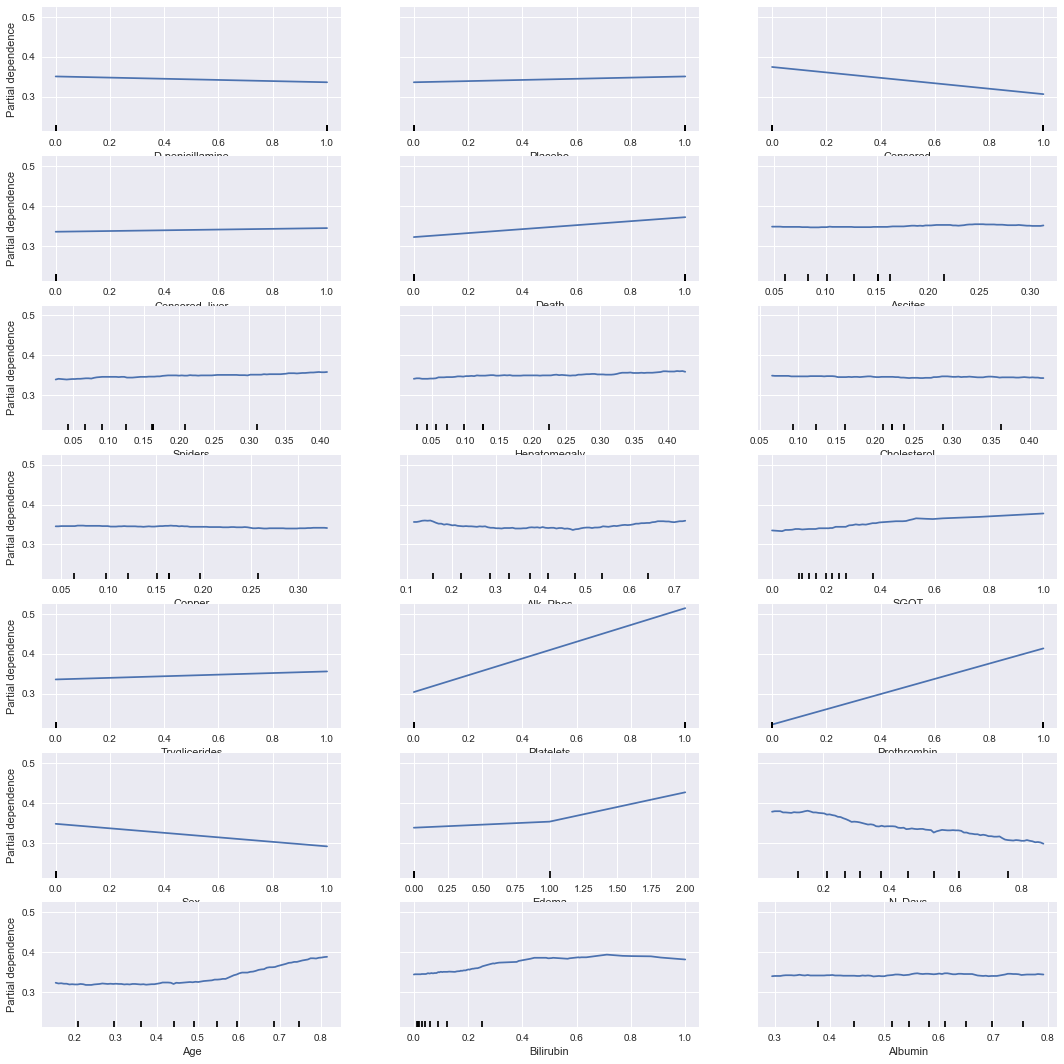

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier()

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import shap

classifiers = [
    ("K-Nearest Neighbors", knn),
    ("Naive Bayes", gnb),
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Multi Layer Perceptron", mlp),
    ("Support Vector Classifier", svm),
    ("Logistic Regression", logreg),
    ("AdaBoost", ada),
    ("Linear Discriminant Analysis", lda)
]

# Feature Importance
def plot_feature_importance(classifier, feature_names):
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 10))
    plt.title(f"Feature Importance - {classifier_name}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# # Partial Dependence Plot
# def plot_partial_dependence(classifier, features, feature_names):
#     display = PartialDependenceDisplay.from_estimator(classifier, X=features, features=feature_names)
#     display.plot(figsize=(12, 6))
#     plt.tight_layout()
#     plt.show()

# Partial Dependence Plot
def plot_partial_dependence(classifier, features, feature_names):
    if hasattr(classifier, "classes_") and len(classifier.classes_) > 2:
        target_classes = [1, 2, 3]  # Specify the target class indices for multi-class classification
    else:
        target_classes = [None]  # For binary classification or regression, target is None

    for target in target_classes:
        display = PartialDependenceDisplay.from_estimator(classifier, X=features, features=feature_names, target=target)
        fig, ax = plt.subplots(figsize=(15, 15))
        display.plot(ax=ax)
        plt.tight_layout()
        plt.show()

    
    
# SHAP Values
def compute_shap_values(classifier, features):
    explainer = shap.Explainer(classifier)
    shap_values = explainer.shap_values(features)
    return shap_values

def plot_shap_summary(shap_values, features):
    shap.summary_plot(shap_values, features, plot_type="bar")

def plot_shap_dependence(shap_values, features):
    shap.dependence_plot(0, shap_values, features)
    plt.show()

for classifier_name, classifier in classifiers:
    # Train the classifier (assuming you have the training data)
    classifier.fit(X_train, y_train)
    
    # Feature Importance
    if hasattr(classifier, "feature_importances_"):
        feature_importances = classifier.feature_importances_
        feature_names = np.array(['D-penicillamine', 'Placebo', 'Censored', 'Censored_liver', 'Death',
       'Ascites', 'Spiders', 'Hepatomegaly', 'Cholesterol', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Sex',
       'Edema', 'N_Days', 'Age', 'Bilirubin', 'Albumin'])  # Replace with your actual feature names
        plot_feature_importance(classifier, feature_names)
    
    # Partial Dependence Plot
    plot_partial_dependence(classifier, X_train, feature_names)
    
    # SHAP Values
    shap_values = compute_shap_values(classifier, X_train)
    plot_shap_summary(shap_values, X_train)
    plot_shap_dependence(shap_values, X_train)


In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import shap

classifiers = [
    ("K-Nearest Neighbors", knn),
    ("Naive Bayes", gnb),
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Multi Layer Perceptron", mlp),
    ("Support Vector Classifier", svm),
    ("Logistic Regression", logreg),
    ("AdaBoost", ada),
    ("Linear Discriminant Analysis", lda)
]

# Feature Importance
def plot_feature_importance(classifier, feature_names):
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance - {classifier_name}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Partial Dependence Plot
def plot_partial_dependence(classifier, features, feature_names):
    if hasattr(classifier, "classes_") and len(classifier.classes_) > 2:
        target_classes = [1, 2, 3]  # Specify the target class indices for multi-class classification
    else:
        target_classes = [None]  # For binary classification or regression, target is None

    for target in target_classes:
        if classifier.__class__.__name__ != "DummyClassifier":  # Skip DummyClassifier
            display = PartialDependenceDisplay.from_estimator(classifier, X=features, features=feature_names, target=target)
            fig, ax = plt.subplots(figsize=(12, 6))
            display.plot(ax=ax)
            plt.tight_layout()
            plt.show()

# SHAP Values
def compute_shap_values(classifier, features):
    if classifier.__class__.__name__ != "DummyClassifier":  # Skip DummyClassifier
        explainer = shap.Explainer(classifier)
        shap_values = explainer.shap_values(features)
        return shap_values
    else:
        return None

def plot_shap_summary(shap_values, features):
    shap.summary_plot(shap_values, features, plot_type="bar")

def plot_shap_dependence(shap_values, features):
    shap.dependence_plot(0, shap_values, features)
    plt.show()

for classifier_name, classifier in classifiers:
    # Train the classifier (assuming you have the training data)
    classifier.fit(X_train, y_train)
    
    # Feature Importance
    if hasattr(classifier, "feature_importances_"):
        feature_importances = classifier.feature_importances_
        feature_names = np.array(['D-penicillamine', 'Placebo', 'Censored', 'Censored_liver', 'Death',
       'Ascites', 'Spiders', 'Hepatomegaly', 'Cholesterol', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Sex',
       'Edema', 'N_Days', 'Age', 'Bilirubin', 'Albumin'])  # Replace with your


Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.


In [71]:
#!pip install -U scikit-learn --user

# Hyperparameter Tuning 


## K-Nearest Neighbor

In [83]:
k = range(1, 60)
k

range(1, 60)

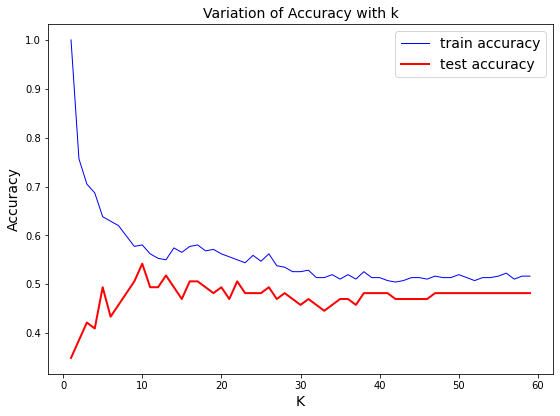

In [84]:
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, knn.predict(X_train)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [85]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

,K,Train Acc,Test Acc
0,1,1.000000,0.349398
1,2,0.756839,0.385542
2,3,0.705167,0.421687
3,4,0.686930,0.409639
4,5,0.638298,0.493976
5,6,0.629179,0.433735
6,7,0.620061,0.457831
7,8,0.598784,0.481928
8,9,0.577508,0.506024
9,10,0.580547,0.542169


In [65]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]

random_grid = {
    'n_neighbors': [10],  # Range for the number of neighbors
    'weights': ['uniform', 'distance'],  # Possible weight options
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm options
    'leaf_size': [int(x) for x in np.linspace(start = 25, stop = 35, num = 5)],  # Range for the leaf size
    'p': [1, 2],  # Values of p (1 for Manhattan distance, 2 for Euclidean distance)
    'metric': ['euclidean', 'manhattan'],  # Distance metric options
}
print(random_grid)

{'n_neighbors': [10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [25, 27, 30, 32, 35], 'p': [1, 2], 'metric': ['euclidean', 'manhattan']}


In [66]:
# Random Search
knn =KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator=knn,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [25, 27, 30, 32, 35],
                                        'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [10], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [68]:
knn_randomcv.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 10,
 'metric': 'euclidean',
 'leaf_size': 27,
 'algorithm': 'auto'}

In [69]:
knn_randomcv.best_estimator_

KNeighborsClassifier(leaf_size=27, metric='euclidean', n_neighbors=10,
                     weights='distance')

In [70]:
knn=KNeighborsClassifier(leaf_size=27, metric='euclidean', n_neighbors=10,weights='distance')
knn.fit(X_train,y_train)
print('K Nearest Neighbor Train Accuracy ', accuracy_score(y_train, knn.predict(X_train) ))
print('K Nearest Neighbor Test Accuracy ', accuracy_score(y_test, knn.predict(X_test) ))

K Nearest Neighbor Train Accuracy  1.0
K Nearest Neighbor Test Accuracy  0.4819277108433735


In [84]:
#Due to overfitting we choose only n_neighbors=10 as hyperparameter
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('K-Nearest Neighbor Train Accuracy ', accuracy_score(y_train, knn.predict(X_train) ))
print('K-Nearest Neighbor Test Accuracy ', accuracy_score(y_test, knn.predict(X_test) ))

K-Nearest Neighbor Train Accuracy  0.5805471124620061
K-Nearest Neighbor Test Accuracy  0.5421686746987951


## Classification Matrix

In [89]:
c_name= "K-Nearest Neighbor"
plot_classification_report(y_train, knn.predict(X_train), y_test, knn.predict(X_test), c_name)


------------------------- K-Nearest Neighbor (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.56      0.49      0.52        90
         2.0       0.56      0.53      0.55       124
         3.0       0.61      0.70      0.66       115

    accuracy                           0.58       329
   macro avg       0.58      0.58      0.57       329
weighted avg       0.58      0.58      0.58       329

------------------------- K-Nearest Neighbor (Test SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.57      0.57      0.57        23
         2.0       0.50      0.55      0.52        31
         3.0       0.58      0.52      0.55        29

    accuracy                           0.54        83
   macro avg       0.55      0.54      0.54        83
weighted avg       0.54      0.54      0.54        83



## Naive Bayes

In [99]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Naive Bayes Train Accuracy ', accuracy_score(y_train, gnb.predict(X_train) ))
print('Naive Bayes Test Accuracy ', accuracy_score(y_test, gnb.predict(X_test) ))

K Nearest Neighbor Train Accuracy  0.513677811550152
K Nearest Neighbor Test Accuracy  0.4819277108433735


## Classification Matrix

In [102]:
c_name= "Naive Bayes"
plot_classification_report(y_train, gnb.predict(X_train), y_test, gnb.predict(X_test), c_name)


------------------------- Naive Bayes (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.42      0.73      0.53        90
         2.0       0.48      0.33      0.39       124
         3.0       0.72      0.54      0.62       115

    accuracy                           0.51       329
   macro avg       0.54      0.53      0.51       329
weighted avg       0.55      0.51      0.51       329

------------------------- Naive Bayes (Test SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.36      0.65      0.46        23
         2.0       0.58      0.35      0.44        31
         3.0       0.64      0.48      0.55        29

    accuracy                           0.48        83
   macro avg       0.52      0.50      0.48        83
weighted avg       0.54      0.48      0.48        83



# Random Forest

In [162]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]

random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],  # Range for the number of estimators
    'criterion': ['gini', 'entropy'],  # Criterion options
    'max_depth': [None] + [int(x) for x in np.linspace(start = 3, stop = 20, num = 5)],
    'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)],  # Range for the minimum samples to split a node
    'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 20, num = 5)],  # Range for the minimum samples in a leaf node
}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 7, 11, 15, 20], 'min_samples_split': [2, 6, 11, 15, 20], 'min_samples_leaf': [1, 5, 10, 15, 20]}


In [163]:
# Random Search
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 7, 11, 15, 20],
                                        'min_samples_leaf': [1, 5, 10, 15, 20],
                                        'min_samples_split': [2, 6, 11, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=100, verbose=2)

In [165]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=6,
                       n_estimators=10)

In [249]:
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=6,
                       n_estimators=10)
rf.fit(X_train,y_train)
print('K Nearest Neighbor Train Accuracy ', accuracy_score(y_train, rf.predict(X_train) ))
print('K Nearest Neighbor Test Accuracy ', accuracy_score(y_test, rf.predict(X_test) ))

K Nearest Neighbor Train Accuracy  0.7082066869300911
K Nearest Neighbor Test Accuracy  0.5180722891566265


In [110]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [111]:
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 670, stop = 1000, num = 10)],  # Range for the number of estimators
    'criterion': ['gini', 'entropy'],  # Criterion options
    'max_depth': [None] + [int(x) for x in np.linspace(start = 3, stop = 20, num = 5)],
    'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)],  # Range for the minimum samples to split a node
    'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 20, num = 5)],  # Range for the minimum samples in a leaf node
}
print(param_grid)

{'n_estimators': [670, 706, 743, 780, 816, 853, 890, 926, 963, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 7, 11, 15, 20], 'min_samples_split': [2, 6, 11, 15, 20], 'min_samples_leaf': [1, 5, 10, 15, 20]}


In [117]:
# Random Search
rf = RandomForestClassifier()
rf_gridcv=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)
### fit the randomized model
rf_gridcv.fit(X_train,y_train)

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=670; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=780; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=890; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=963; total time=   1.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=816; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=11, n_estimators=670; t

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=743; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=816; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=926; total time=   1.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=780; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=890; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_sa

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=670; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=743; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=853; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=963; total time=   1.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=816; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=890; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_sa

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=706; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=780; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=890; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=743; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=853; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=11, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_s

[CV] END criterion=gini, max_depth=None, min_samples_leaf=15, min_samples_split=20, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=20, min_samples_split=2, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=20, min_samples_split=2, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=20, min_samples_split=2, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=20, min_samples_split=2, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=20, min_samples_split=6, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=20, min_samples_split=6, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=20, min_samples_split=6, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=None

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=816; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=743; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=853; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=963; total time=   1.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=780; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_s

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=706; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=816; total time=   1.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=890; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=743; total time=   1.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=853; total time=   1.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=11, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=None, min_s

[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=853; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=963; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=780; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=853; total time=   1.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=706; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, 

[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=780; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=890; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=706; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=890; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10

[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=853; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=780; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=853; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10

[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=890; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=1000; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=816; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=926; total time=   1.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=743; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10

[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=890; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=706; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=816; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=926; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=1000; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, min_samples_split=11, n_estimators=743; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, min_samples_split=11, n_estimators=853; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=15, m

[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=816; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=926; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=1000; total time=   1.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=780; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=890; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1

[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=780; total time=   1.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=853; total time=   1.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=816; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=890; total time=   1.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=1000; total time=   1.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples

[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=853; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=11, n_estimators=926; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=743; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=853; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=15, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1

[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=11, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=11, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=11, n_estimators=1000; total time=   1.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=780; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=890; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=963; total time=   1.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=780; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=

[CV] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=11, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=11, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=15, n_estimators=780; total time=   1.2s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=15, n_estimators=890; total time=   1.4s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=15, n_estimators=1000; total time=   1.6s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=20, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=20, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=15, min_samples_split=20, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=11, min_sam

[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=890; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=743; total time=   1.0s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=670; total time=   1.2s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=743; total time=   1.3s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1

[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=1000; total time=   1.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=890; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=1000; total time=   1.6s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=743; total time=   1.4s
[CV] END criterion=gini, max_depth=11, min_samples_leaf

[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=780; total time=   1.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=890; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=1000; total time=   1.6s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=706; total time=   1.2s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=816; total time=   1.4s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=926; total time=   1.7s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1,

[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=15, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=743; total time=   1.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=853; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=963; total time=   1.4s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=670; total time=   1.3s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=780; total time=   1.4s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=890; total time=   1.6s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, 

[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=780; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=853; total time=   1.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=20, min_samples_split=20, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=706; total time=   1.3s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=780; total time=   1.4s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=890; total time=   1.7s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.6s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=6, n_estimators=743; total time=   1.2s
[CV] END criterion=gini, max_depth=11, min_samples_leaf=1, m

[CV] END criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=890; total time=   1.4s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=853; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=743; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf

[CV] END criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=743; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=853; total time=   1.3s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=926; total time=   1.4s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=780; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=890; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=

[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=780; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=853; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=816; total time=   1.4s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=890; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_lea

[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=743; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=853; total time=   1.3s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=670; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=780; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=890; total time=   1.6s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=963; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf

[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=816; total time=   1.4s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=926; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf

[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=890; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.6s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=853; total time=   1.6s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=926; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=670; total time=   1.0s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_le

[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=816; total time=   1.6s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=926; total time=   1.6s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=670; total time=   0.9s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=743; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=926; total time=   1.3s
[CV] END criterion=gini, max_depth=15, min_samples_

[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=853; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=963; total time=   1.4s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=706; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=780; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=890; total time=   1.3s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=15, n_estimators=706; total time=   1.0s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=10, min_samples_split=15, n_estimators=816; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_sample

KeyboardInterrupt: 

# Support Vector Classifier

In [ ]:
from sklearn import svm
# Create an instance of the SVC classifier
svm = svm.SVC()

svm_randomcv=RandomizedSearchCV(estimator=svm,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
svm_randomcv.fit(X_train,y_train)

In [ ]:
svm_randomcv.best_params_


In [ ]:
svm_randomcv.best_estimator_


In [ ]:
from sklearn import svm
svm = svm.SVC(C=10.0, decision_function_shape='ovo', degree=1, gamma=0.1, kernel='poly',
    shrinking=False, tol=0.0001)

svm.fit(X_train,y_train)

In [ ]:
y_pred = svm_randomcv.predict(X_test)
print('SVC Test Accuracy ', accuracy_score(y_test, y_pred ))

## MLP Classifier

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Define the specific values for each hyperparameter
hidden_layer_sizes = [(50,), (100,), (50, 50), (100, 100)]
activation = ['relu', 'logistic', 'tanh']
solver = ['sgd', 'adam']
alpha = [0.0001, 0.001, 0.01]
learning_rate = ['constant', 'adaptive']
learning_rate_init = [0.001, 0.01, 0.1]
max_iter = [100, 200, 500]
random_state = [None]

# Create the random grid
random_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'solver': solver,
    'alpha': alpha,
    'learning_rate': learning_rate,
    'learning_rate_init': learning_rate_init,
    'max_iter': max_iter,
    'random_state': random_state,
}

print(random_grid)



In [ ]:
# Create an instance of the MLP classifier
mlp = MLPClassifier()

mlp_randomcv=RandomizedSearchCV(estimator=mlp,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
mlp_randomcv.fit(X_train,y_train)

In [146]:
mlp_randomcv.best_params_

In [147]:
mlp_randomcv.best_estimator_


------------------------- Liner  (TRAIN SET) -------------------------
              precision    recall  f1-score   support

         1.0       0.48      0.52      0.50        23
         2.0       0.43      0.48      0.45        31
         3.0       0.70      0.55      0.62        29

    accuracy                           0.52        83
   macro avg       0.53      0.52      0.52        83
weighted avg       0.54      0.52      0.52        83



In [ ]:
mlp = MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100),learning_rate='adaptive', solver='sgd')
mlp.fit(X_train,y_train)

In [ ]:
y_pred = mlp_randomcv.predict(X_test)
print('MLP Test Accuracy ', accuracy_score(y_test, y_pred ))

## AdaBoost

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Define the specific values for each hyperparameter
n_estimators = [50, 100, 200]
learning_rate = [0.1, 0.5, 1.0]
algorithm = ['SAMME', 'SAMME.R']
random_state = [None]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'algorithm': algorithm,
    'random_state': random_state,
}

print(random_grid)


In [ ]:
# Create an instance of the AdaBoost classifier
ada = AdaBoostClassifier()

ada_randomcv=RandomizedSearchCV(estimator=ada,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
ada_randomcv.fit(X_train,y_train)

In [ ]:
ada_randomcv.best_params_

In [ ]:
ada_randomcv.best_estimator_

In [ ]:
ada= AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=100)
ada.fit(X_train,y_train)

In [ ]:
y_pred = ada_randomcv.predict(X_test)
print('AdaBoost Test Accuracy ', accuracy_score(y_test, y_pred ))

## LDA Classifier


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV

solver = ['svd', 'lsqr']
shrinkage = [None, 'auto', 0.1, 0.5]
n_components = [None, 2, 5, 10]
store_covariance = [True, False]
tol = [0.0001, 0.001, 0.01]

# Create the random grid (empty in this case)
random_grid = {
    'solver': solver,
    'shrinkage': shrinkage,
    'n_components': n_components,
    'store_covariance': store_covariance,
    'tol': tol,
}

print(random_grid)


In [ ]:
# Create an instance of the LDA classifier
lda = LinearDiscriminantAnalysis()

lda_randomcv=RandomizedSearchCV(estimator=lda,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
lda_randomcv.fit(X_train,y_train)

In [ ]:
lda_randomcv.best_params_


In [ ]:
lda_randomcv.best_estimator_

In [ ]:
lda=  LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='lsqr')
lda.fit(X_train,y_train)

In [ ]:
y_pred = lda_randomcv.predict(X_test)
print('LDA Test Accuracy ', accuracy_score(y_test, y_pred ))